In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import sympy

from numpy.polynomial import Polynomial

# Basic Algebra Exercise
## Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra

### Problem 1. Polynomial Interpolation
We know that if we have a set of $n$ data points with coordinates $(x_1; y_1), (x_2; y_2), \dots, (x_n; y_n)$, we can try to figure out what function may have generated these points.

Please note that **our assumptions about the data** will lead us to choosing one function over another. This means that our results are as good as our data and assumptions. Therefore, it's extremely important that we write down our assumptions (which sometimes can be difficult as we sometimes don't realize we're making them). It will be better for our readers if they know what those assumptions and models are.

In this case, we'll state two assumptions:
1. The points in our dataset are generated by a polynomial function
2. The points are very precise, there is absolutely no error in them. This means that the function should pass **through every point**

This method is called *polynomial interpolation* (*"polynomial"* captures assumption 1 and *"interpolation"* captures assumption 2).

It can be proved (look at [Wikipedia](https://en.wikipedia.org/wiki/Polynomial_interpolation) for example) that if we have $n$ data points, there is only one polynomial of degree $n-1$ which passes through them. In "math speak": "the vector spaces of $n$ points and polynomials of degree $n-1$ are isomorphic (there exists a bijection mapping one to the other)".

There are a lot of ways to do interpolation. We can also write the function ourselves if we want but this requires quite a lot more knowledge than we already covered in this course. So we'll use a function which does this for us. `numpy.polyfit()` is one such function. It accepts three main parameters (there are others as well, but they are optional): a list of $x$ coordinates, a list of $y$ coordinates, and a polynomial degree.

Let's say we have these points:
```python
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
```

First, we need to "extract" the coordinates:
```python
x = points[:, 0]
y = points[:, 1]
```

Then, we need to calculate the interpolating polynomial. For the degree, we'll initially set $n-1$:
```python
poly = np.polynomial.polynomial.Polynomial.fit(...)
# TODO: Find a way to make the line shorter; call the correct arguments
```

After that, we need to plot the function. To do this, we'll create a range of $x$ values and evaluate the polynomial at each value:
```python
plot_x = np.linspace(np.min(x), np.max(x), 1000) # If you want, pass the number of points as a parameter
plot_y = poly(plot_x)
```

Finally, we need to plot the result. We'll plot both the fitting polynomial curve (using `plt.plot()`) and the points (using `plt.scatter`). It's also nice to have different colors to make the line stand out from the points.
```python
plt.plot(plot_x, plot_y, c = "green")
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
```
Don't forget to label the axes!

In [3]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])

# x = [point[0] for point in points]
# y = [point[1] for point in points]

x, y = points[:, 0], points[:, 1]
x, y

(array([0., 1., 2., 3., 4., 5.]), array([ 0. ,  0.8,  0.9,  0.1, -0.8, -1. ]))

In [4]:
poly = Polynomial.fit(x, y, len(x) - 1)
poly

Polynomial([ 0.57421875, -2.09505208, -1.88802083,  2.40885417,  0.81380208,
       -0.81380208], domain=[0., 5.], window=[-1.,  1.], symbol='x')

In [5]:
plot_x = np.linspace(np.min(x), np.max(x), 1000)
plot_y = poly(plot_x)

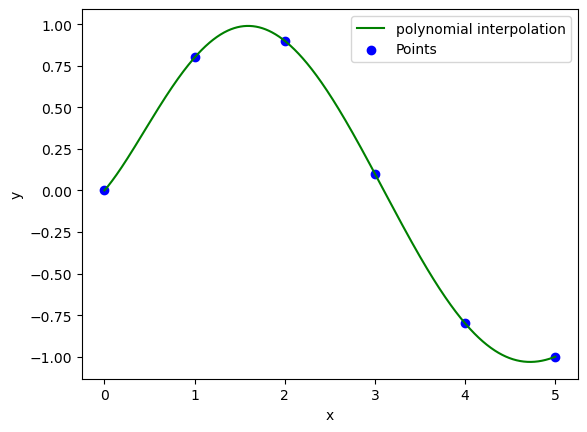

In [6]:
plt.plot(plot_x, plot_y, c = 'g', label="polynomial interpolation")
plt.scatter(x, y, c = 'b', label="Points")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

Your task now is to **wrap the code in a function**. It should accept a list of points, the polynomial degree, min and max value of $x$ used for plotting. 

**Be extremely careful to ensure that the function uses its parameters!** Of course, you can extract other utility functions if you wish (e.g., separating plotting from the rest is a good idea).

We'll use this function to try some other cases.

In [7]:
def polynomial(x, y, degree):
    return Polynomial.fit(x, y, deg=degree)

In [8]:
def interpolate_polynomial(points, degree, min_x, max_x):
    x, y = points[:, 0], points[:, 1]
    poly = polynomial(x, y, degree)

    x_vals = np.linspace(min_x, max_x, 1000)
    y_vals = poly(x_vals)

    plt.scatter(x, y, c='r', label="Points")
    plt.plot(x_vals, y_vals, c='g', label=f"Polynomial of {degree} degree")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

    plt.show()

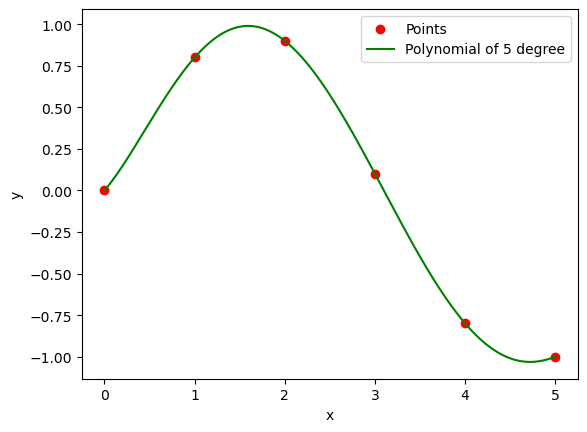

In [9]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see this is a very nice fit. This is expected, of course. Let's try to expand our view a little. Let's try to plot other values of $x$, further than the original ones. This is **extrapolation**.

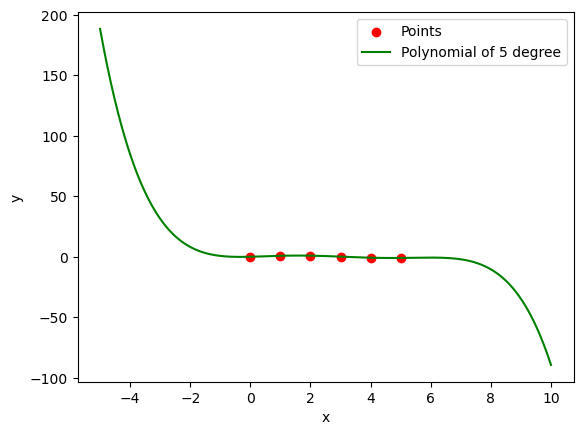

In [10]:
interpolate_polynomial(points, len(points) - 1, -5, 10)

Hmmm... it seems our polynomial goes a little wild outside the original range. This is to show how **extrapolation can be quite dangerous**.

Let's try a lower polynomial degree now. We used 4, how about 3, 2 and 1?
**Note:** We can add titles to every plot so that we know what exactly we're doing. Te title may be passed as an additional parameter to our function.

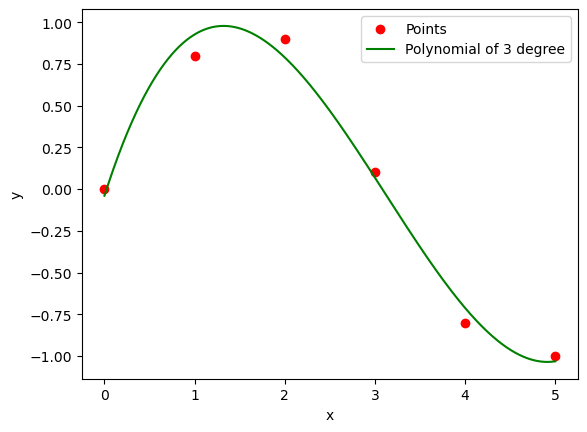

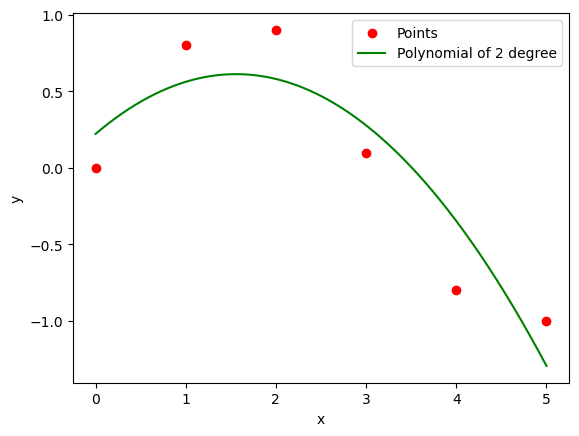

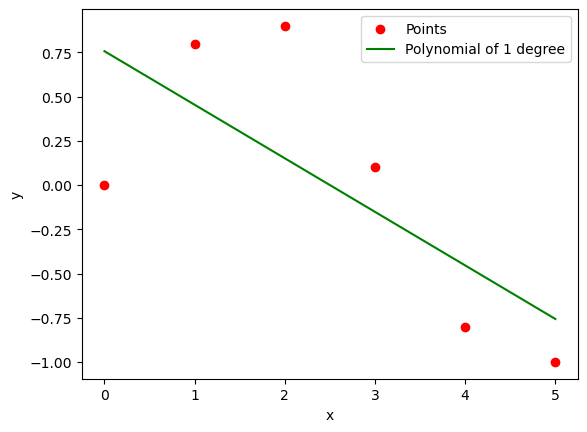

In [11]:
interpolate_polynomial(points, 3, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 2, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see the fitting curves (or line in the last case) struggle more and more and they don't pass through every point. This breaks our assumptions but it can be very useful.

Okay, one more thing. How about increasing the degree? Let's try 5, 7 and 10. Python might complain a little, just ignore it, everything is fine... sort of :).

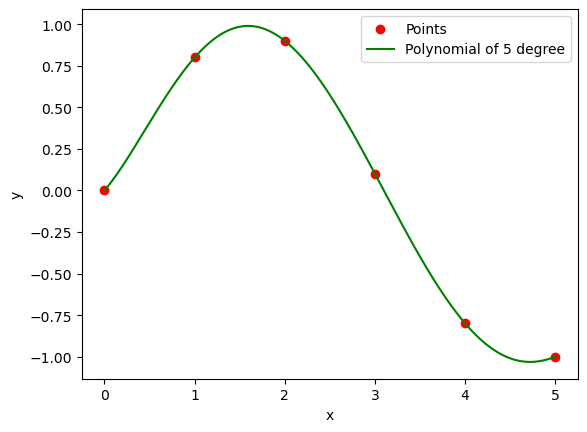

C:\Users\Mincho\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1476: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


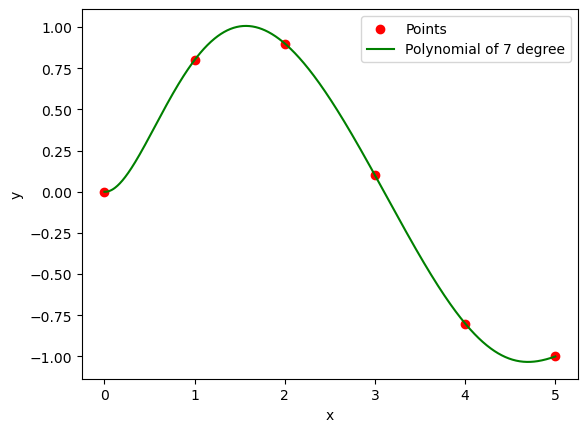

C:\Users\Mincho\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1476: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


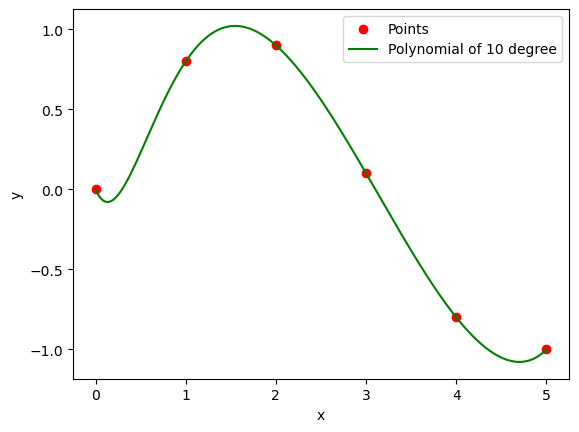

In [12]:
interpolate_polynomial(points, 5, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 7, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 10, np.min(points[:, 0]), np.max(points[:, 0]))

Those graphs look pretty much the same. But that's the point exactly. I'm being quite sneaky here. Let's try to expand our view once again and see what our results really look like.

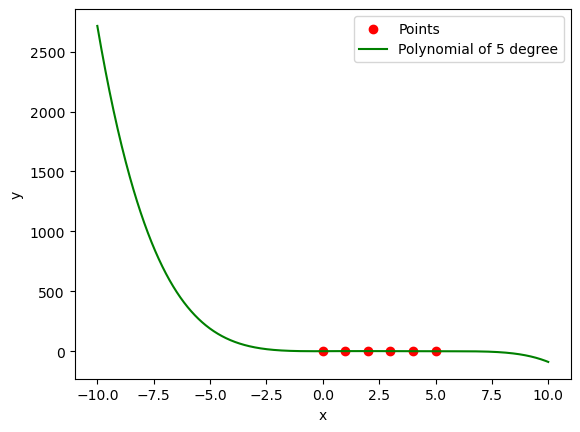

C:\Users\Mincho\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1476: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


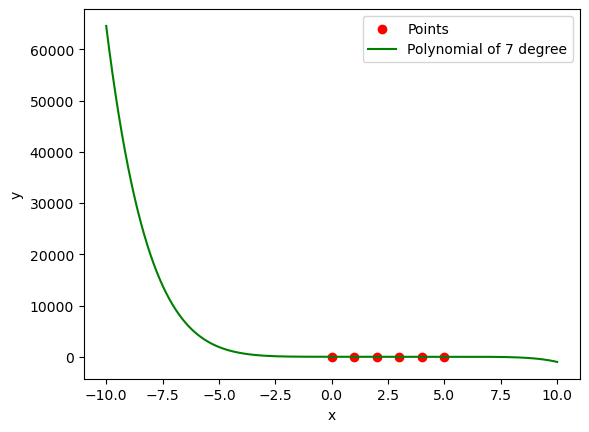

C:\Users\Mincho\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1476: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


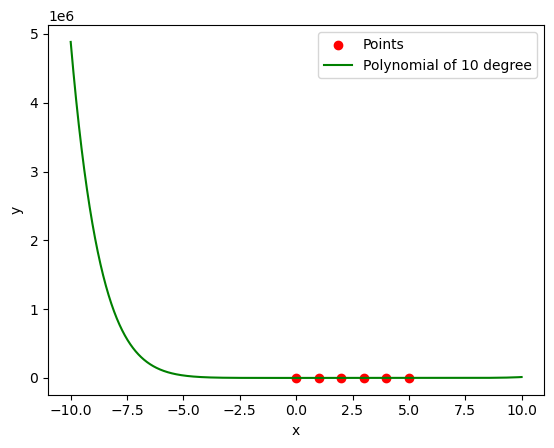

In [13]:
interpolate_polynomial(points, 5, -10, 10)
interpolate_polynomial(points, 7, -10, 10)
interpolate_polynomial(points, 10, -10, 10)

Now we see there are very wild differences. Even though the first two plots look quite similar, look at the $y$ values - they're quite different.

So, these are the dangers of interpolation. Use a too high degree, and you get "the polynomial wiggle". These are all meant to represent **the same** data points but they look insanely different. Here's one more comparison.

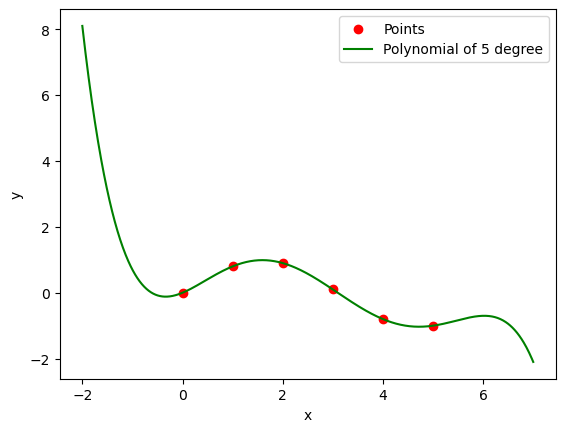

C:\Users\Mincho\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1476: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


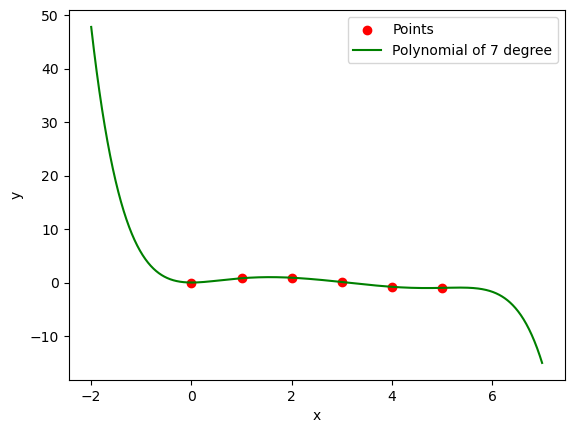

In [14]:
interpolate_polynomial(points, len(points) - 1, -2, 7)
interpolate_polynomial(points, len(points) + 1, -2, 7)

Now we can see what big difference even a small change in degree can make. This is why we have to choose our interpolating functions very carefully. Generally, a lower degree means a simpler function, which is to be preferred. See [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor).

To illustrate this, let's use the following set of points. What degree do you think would be the most reasonable? What are the coefficents of the interpolation?

In [15]:
points = np.array([(1, 0.5), (2, 3), (3, 2), (4, -1), (5, 1.5)])
p = Polynomial.fit(points[:, 0], points[:, 1], deg = len(points) - 1)
p.coef

array([ 2. , -5.5, -5. ,  6. ,  4. ])

Now let's add one more point. What can you observe now?

In [16]:
points = np.array([(1, 0.5), (2, 3), (3, 2), (4, -1), (5, 1.5), (6, 23)])
p = Polynomial.fit(points[:, 0], points[:, 1], deg = len(points) - 1)
p.coef

# ~ -2,9e-14 is veeery close to 0

array([ 4.21875000e-01, -8.28125000e+00,  1.56250000e+00,  1.95312500e+01,
        9.76562500e+00, -2.89515902e-14])

Finally, **we need to be very careful about our assumptions**. Have a look at this situation:

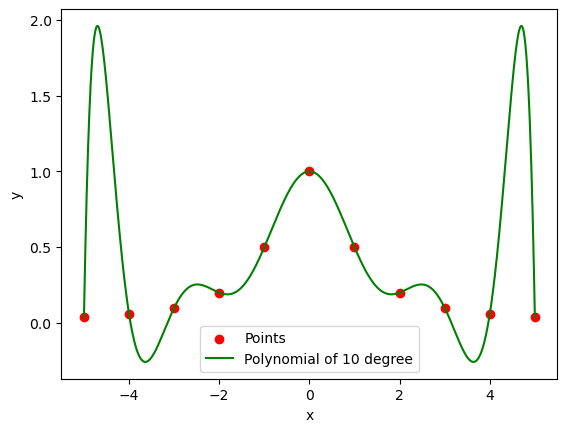

In [17]:
points = np.array([(-5, 0.03846), (-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882), (5, 0.03846)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

This plot definitely looks strange... This is because the generating function is not a polynomial. It's actually:
$$ y = \frac{1}{1 + x^2} $$

Plot the polynomial interpolation and the real generating function **on the same plot**. You may need to modify the original plotting function or just copy its contents.

In [18]:
x_final = np.linspace(-5, 5, 1000)
y_final = 1 / (1 + x_final**2)

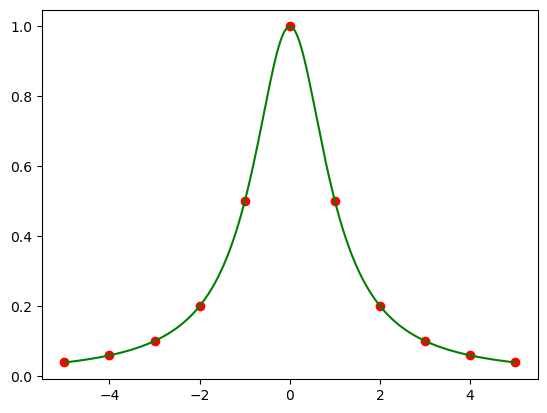

In [19]:
plt.scatter(points[:, 0], points[:, 1], c='r')
plt.plot(x_final, y_final, c = 'g')
plt.show()

### Problem 2. Set Equivalence Theory
Have you played Sudoku? It used to be quite popular, and it still is; with boards that range from very simple to extremely complex. From random grannies, to the most brilliant computer scientists and mathematicians - everyone can get a kick out of a well-made puzzle. Sudoku has a lot of variants which make solving very fun and challenging, but let's focus on the classic variant now.

In the game, you must fill a 9x9 board with digits 1-9, once each in every row, every column, and every 3x3 region (or "box", or sometimes called "house"). You can find some example boards [here](https://sandiway.arizona.edu/sudoku/examples.html).

One of the most interesting solcing techniques comes from the so-called SET (or set equivalence theory; we love recursive acronyms...). It consists of finding set unions and intersections which lead to equivalent sets. Let's look at an example:
1. Consider $S_1 = R_1 \cup R_2$ - 2 sets of digits 1-9 in some order
2. Also consider $S_2 = C_1 \cup C_2$ - also 2 sets of digits 1-9 in some order
3. $\{R1C1, R1C2, R2C1, R2C2\} \in S_1 \cap S_2$
4. Since we started with identical sets and removed the same elements from both, the remaining elements (colored red and blue in the figure below) must also be the same. We don't know the order, but we know they **must** contain the same digits.

![An example of SET](sudoku.png)

Now, use this newly acquired knowledge to prove the following two figures.

Find appropriate sets, think about unions, intersections, and differences (e.g., in the figure above, the colored squares represent the differences of the sets). I think you should be able to outline a proof using LaTeX only, but a coding solution would also work. You're free to choose the approach.

a) **Phistomefel's Ring**. Prove that the set of red cells contains the same numbers as the set of blue cells.

![Phistomefel's ring](phistomefel.png)

b) **Aad (van de Wettering)'s Set**. Prove that the set of red cells contains the same numbers as the blue cells + 1 full set of the digits 1-9.

![Aad's set](aad.png)

a) **Phistomefel's Ring**. Prove that the set of red cells contains the same numbers as the set of blue cells.

![Phistomefel's ring](phistomefel.png)


<br>I'll write an expression and then explain.

$\begin{align}
S_1 &= 
\underbrace{
\underbrace{((C_3 \cup C_4 \cup C_5 \cup C_6 \cup C_7)\ \setminus\ B_{2,\ 2})}_{\text{union of columns without the middle box}}
\quad \setminus\ 
\underbrace{(R_1 \cup R_2 \cup R_8 \cup R_9)}_{\text{taking the difference from the rows}}
}_{\text{Middle Ring}} \\ \\
S_2 &=
\underbrace{((R_1 \cup R_2 \cup R_8 \cup R_9)
\ \setminus\ 
(C_3 \cup C_4 \cup C_5 \cup C_6 \cup C_7))}_{\text{difference between the union of R1-R2-R7-R8 rows and the union of C4-C7 columns}} \\ \\
S_1 &\equiv S_2
\end{align}$

* $S1$ is the set of the **union** of columns $C_3, C_4, C_5, C_6, C_7$ **without the middle Box** of the Grid $B_{2,\ 2}$, 
<br>from chich we took the **difference** between what's left of the columns and the rows $R_1, R_2, R_8, R_9$.
* $S2$ is the set of the difference between the union of $R_1, R_2, R_7, R_8$ rows and the union of $C_4-C_7$ columns.

I wish to also try and prove this using python.

In [20]:
''' 
    For this test, i'll hardcode a solved Sudoku and try to prove Phistomefel's Ring.
    
    The first time I tried, I had a set of numbers for each row and column.
    The thing is, when i try to unize or intersect these sets, I always got a new set of {1, 2,...,9}
    which makes sense, given the rules of sets and the operations with them.
    
    I saw a colleague from my class solve it using indexes, creating tuples and that's what i'm gonna try.
    I'm going to combine my idea of hard coding the sudoku's solution and his idea of indexes.
    
    Given we look at a such tuple like (row, column), where if we look at a row set - the row part [0] of a tuple is the index and the column [1] is the number.
    And if we look at a column set, the row part [0] is the number and the column [1] is the index.
    
    for rows: (i, n) -> where i is the index and n is the number
    for columns: (n, i) --^^^
''' 
# Rows
r1 = {(1, 4), (1, 3), (1, 5), (1, 2), (1, 6), (1, 9), (1, 7), (1, 8), (1, 1)}
r2 = {(2, 6), (2, 8), (2, 2), (2, 5), (2, 7), (2, 1), (2, 4), (2, 9), (2, 3)}
r3 = {(3, 1), (3, 9), (3, 7), (3, 8), (3, 3), (3, 4), (3, 5), (3, 6), (3, 2)}

r4 = {(4, 8), (4, 2), (4, 6), (4, 1), (4, 9), (4, 5), (4, 3), (4, 4), (4, 7)}
r5 = {(5, 3), (5, 7), (5, 4), (5, 6), (5, 8), (5, 2), (5, 9), (5, 1), (5, 5)}
r6 = {(6, 9), (6, 5), (6, 1), (6, 7), (6, 4), (6, 3), (6, 6), (6, 2), (6, 8)}

r7 = {(7, 5), (7, 1), (7, 9), (7, 3), (7, 2), (7, 6), (7, 8), (7, 7), (7, 4)}
r8 = {(8, 2), (8, 4), (8, 8), (8, 9), (8, 5), (8, 7), (8, 1), (8, 3), (8, 6)}
r9 = {(9, 7), (9, 6), (9, 3), (9, 4), (9, 1), (9, 8), (9, 2), (9, 5), (9, 9)}


# Columns
c1 = {(4, 1), (6, 1), (1, 1), (8, 1), (3, 1), (9, 1), (5, 1), (2, 1), (7, 1)}
c2 = {(3, 2), (8, 2), (9, 2), (2, 2), (7, 2), (5, 2), (1, 2), (4, 2), (6, 2)}
c3 = {(5, 3), (2, 3), (7, 3), (6, 3), (4, 3), (1, 3), (9, 3), (8, 3), (3, 3)}

c4 = {(2, 4), (5, 4), (8, 4), (1, 4), (6, 4), (7, 4), (3, 4), (9, 4), (4, 4)}
c5 = {(6, 5), (7, 5), (3, 5), (9, 5), (8, 5), (4, 5), (2, 5), (5, 5), (1, 5)}
c6 = {(9, 6), (1, 6), (4, 6), (5, 6), (2, 6), (3, 6), (6, 6), (7, 6), (8, 6)}

c7 = {(7, 7), (4, 7), (5, 7), (3, 7), (9, 7), (6, 7), (8, 7), (1, 7), (2, 7)}
c8 = {(8, 8), (9, 8), (6, 8), (4, 8), (1, 8), (2, 8), (7, 8), (3, 8), (5, 8)}
c9 = {(1, 9), (3, 9), (2, 9), (7, 9), (5, 9), (8, 9), (4, 9), (6, 9), (9, 9)}


rows_of_interest_combined = r1 | r2 | r8 | r9
cols_of_interest_combined = c3 | c4 | c5 | c6 | c7

rows_of_interest_differences = rows_of_interest_combined - cols_of_interest_combined
print(rows_of_interest_differences)
print(len(rows_of_interest_differences))

{(8, 8), (1, 2), (2, 1), (8, 1), (9, 9), (1, 1), (1, 8), (9, 2), (2, 9), (8, 9), (9, 8), (2, 2), (8, 2), (9, 1), (1, 9), (2, 8)}
16


Whilst I get 16 numbers from the differences from the unions of (r1,r2,r8,r9) and the unions of (c3,c4,c5,c6,c7), it doesn't seem to be the correct way at all to approach this problem.

Therefore, the only way to do this seems to be with indexes only - (index_row, index_column).

In [21]:
r1 = {(1, i) for i in range(1, 10)}
r2 = {(2, i) for i in range(1, 10)}
r8 = {(8, i) for i in range(1, 10)}
r9 = {(9, i) for i in range(1, 10)}

c3 = {(i, 3) for i in range(1, 10)}
c4 = {(i, 4) for i in range(1, 10)}
c5 = {(i, 5) for i in range(1, 10)}
c6 = {(i, 6) for i in range(1, 10)}
c7 = {(i, 7) for i in range(1, 10)}

rows_united = r1 | r2 | r8 | r9
cols_united = c3 | c4 | c5 | c6 | c7

side_row_squares = rows_united - cols_united

# removing the middle box from the equation...
cols_without_middle_box = cols_united - {(r, c) for r in range(4, 7) for c in range(4, 7)}
middle_ring = cols_without_middle_box - rows_united

In [22]:
# For clarity, let's print out the side_row_squares and middle_ring.
print("Row Squares:", side_row_squares)
print("Middle Ring:", middle_ring)

Row Squares: {(8, 8), (1, 2), (2, 1), (8, 1), (9, 9), (1, 1), (1, 8), (9, 2), (2, 9), (8, 9), (9, 8), (2, 2), (8, 2), (9, 1), (1, 9), (2, 8)}
Middle Ring: {(7, 4), (3, 4), (7, 7), (4, 3), (3, 7), (5, 7), (7, 3), (6, 7), (3, 3), (7, 6), (3, 6), (5, 3), (7, 5), (6, 3), (4, 7), (3, 5)}


The thing is, I can't test any further with this method. 

Let's test with numbrs, using the indexes above.

Since i'm not motivated enough at the moment to create a algorithm to compare indices to numbers and then to write other logics, i'll hard-code everything below...

In [23]:
from collections import Counter
# Using the solved sudoku 2 cells above, i'll simply create 2 lists of numbers and compare them.
row_squares_numbers = [4, 3, 6, 8, 8, 1, 9, 3, 2, 4, 7, 6, 3, 6, 5, 9]
middle_ring_numbers = [7, 8, 3, 4, 5, 3, 9, 6, 8, 6, 2, 3, 9, 1, 4, 6]

# I'll use the Counter class from collections to count each number and then compare
counter_row_squares = Counter(row_squares_numbers)
counter_middle_ring = Counter(middle_ring_numbers)

print("Row Squares Counter:", counter_row_squares)
print("Middle Ring Counter:", counter_middle_ring)
print("Compare both counters:", counter_row_squares == counter_middle_ring)

Row Squares Counter: Counter({3: 3, 6: 3, 4: 2, 8: 2, 9: 2, 1: 1, 2: 1, 7: 1, 5: 1})
Middle Ring Counter: Counter({3: 3, 6: 3, 8: 2, 4: 2, 9: 2, 7: 1, 5: 1, 2: 1, 1: 1})
Compare both counters: True


Given the results in both cells above, I believe I proved Phistomefel's Ring.

b) **Aad (van de Wettering)'s Set**. Prove that the set of red cells contains the same numbers as the blue cells + 1 full set of the digits 1-9.

![Aad's set](aad.png)

$\begin{align}
S_1 &= 
\underbrace{((R_1 \cup R_2 \cup R_3)\ \cap\ (C_5 \cup C_6))}_{\text{top block of red cells}}
\ \cup\ 
\underbrace{((R_4 \cup R_5)\ \cap\ (C_5 \cup C_6 \cup C_7 \cup C_8 \cup C_9))}_{\text{bottom block of red cells}}
\\ \\
S_2 &= 
\underbrace{((R_6)\ \cap\ (C_1 \cup C_2 \cup C_3 \cup C_4))}_{\text{top block of blue cells}}
\ \cup\ 
\underbrace{((R_7 \cup R_8 \cup R_9)\ \cap\ (C_4))}_{\text{bottom block of blue cells}}
\\ \\
S_1 &\equiv
S_2\ \cup\ \{1, 2, 3, 4, 5, 6, 7, 8, 9\} 
\\ \\
S_2 &\equiv
S_1\ \setminus\ \{1, 2, 3, 4, 5, 6, 7, 8, 9\} 
\end{align}$


* $S_1$ is the set of the red cells from the image.
* $S_2$ is the set of the blue cells from the image.

! Note !
<br>I won't be proving this one in python yet, maybe another time:)
<br>
! Note !

### Problem 3. Complex Numbers as Vectors
We saw that a complex number $z = a + bi$ is equivalent to (and therefore can be represented as) the ordered tuple $(a; b)$, which can be plotted in a 2D space. So, complex numbers and 2D points are equivalent. What is more, we can draw a vector from the origin of the coordinate plane to our point. This is called a point's **radius-vector**.

Let's try plotting complex numbers as radius vectors. Don't forget to label the real and imaginary axes. Also, move the axes to the origin. Hint: These are called "spines"; you'll need to move 2 of them to the origin and remove the other 2 completely. Hint 2: You already did this in the previous lab.

We can use `plt.quiver()` to plot the vector. It can behave a bit strangely, so we'll need to set the scale of the vectors to be the same as the scale on the graph axes:
```python
plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
```

Other than that, the main parameters are: $x_{begin}$, $y_{begin}$, $x_{length}$, $y_{length}$ in that order.

Now, set the aspect ratio of the axes to be equal. Also, add grid lines. Set the axis numbers (called ticks) to be something like `range(-3, 4)` for now.
```python
plt.xticks(range(-4, 4))
plt.yticks(range(-4, 4))

```

If you wish to, you can be a bit more clever with the tick marks. Find the minimal and maximal $x$ and $y$ values and set the ticks according to them. It's a good practice not to jam the plot too much, so leave a little bit of space. That is, if the actual x-range is $[-2; 2]$, set the plotting to be $[-2.5; 2.5]$ for example. Otherwise, the vector heads (arrows) will be "jammed" into a corner or side of the plot.

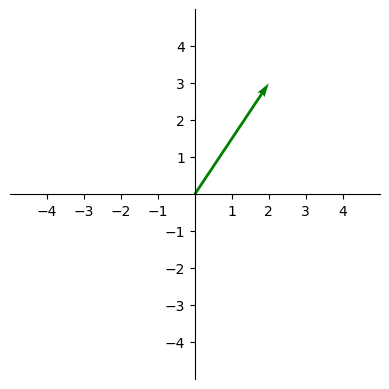

In [24]:
def plot_complex_number(z):
    """
    Plots the complex number z as a radius vector in the 2D space
    """
    plt.quiver(0, 0, z.real, z.imag, angles = 'xy', scale_units = 'xy', scale = 1, color='g')
    
    ax = plt.gca()
    
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
   
    ax.set_aspect("equal")
    
    ax.set_xlim(int(-z.real - 3), int(z.real + 3))
    ax.set_ylim(int(-z.imag - 2), int(z.imag + 2))
    
    ax.set_xticks([i for i in range(int(-z.real - 2), int(z.real + 3)) if i != 0])
    ax.set_yticks([i for i in range(int(-z.imag - 1), int(z.imag + 2)) if i != 0])
    
    plt.show()

plot_complex_number(2 + 3j)

How about many numbers? We'll need to get a little bit more creative. First, we need to create a 2D array, each element of which will be a 4-element array: `[0, 0, z.real, z.imag]`. Next, `plt.quiver()` can accept a range of values. Look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib) for details and adapt your code.

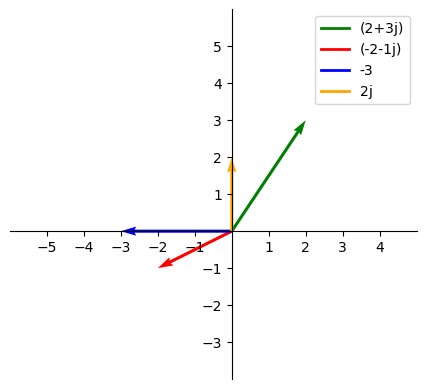

In [25]:
def plot_complex_numbers(numbers, colors):
    """
    Plots the given complex numbers as radius vectors in the 2D space
    """
    real_n = [n.real for n in numbers]
    imag_n = [n.imag for n in numbers]
    zeros = [0] * len(numbers) 
    
    plt.quiver(zeros, zeros, real_n, imag_n, angles = "xy", scale_units = "xy", scale = 1, color = colors)
    
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    x_lim_min = min(real_n) - 3
    x_lim_max = max(real_n) + 3
    y_lim_min = min(imag_n) - 3
    y_lim_max = max(imag_n) + 3

    ax.set_xlim(x_lim_min, x_lim_max)
    ax.set_ylim(y_lim_min, y_lim_max)

    ax.set_xticks([i for i in range(int(x_lim_min) + 1, int(x_lim_max)) if i != 0])
    ax.set_yticks([i for i in range(int(y_lim_min) + 1, int(y_lim_max)) if i != 0])
    ax.set_aspect("equal")

    legend_handles = [Line2D([0], [0], color=color, lw=2, label=str(num)) for num, color in zip(numbers, colors)]
    plt.legend(handles=legend_handles, loc="best")
    
    plt.show()

plot_complex_numbers([2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

Now let's add two numbers and plot the result.

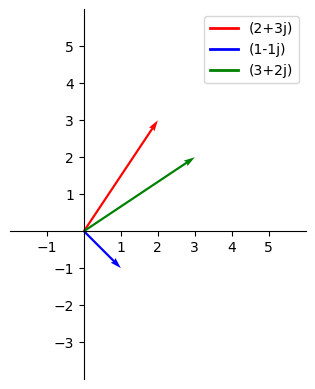

In [26]:
z1 = 2 + 3j
z2 = 1 - 1j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

We can see that adding the complex numbers is equivalent to adding vectors (remember the "parallelogram rule"). As special cases, let's try adding pure real and pure imaginary numbers:

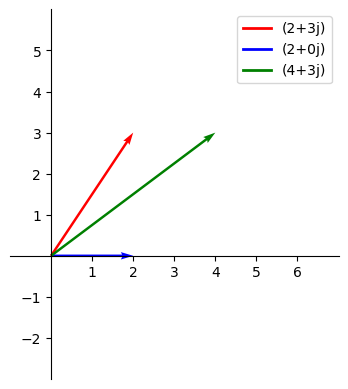

In [27]:
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

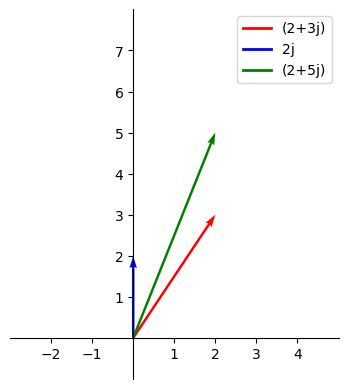

In [28]:
z1 = 2 + 3j
z2 = 0 + 2j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

How about multiplication? First we know that multiplying by 1 gives us the same vector and mulpiplying by -1 gives us the reversed version of the same vector. How about multiplication by $\pm i$?

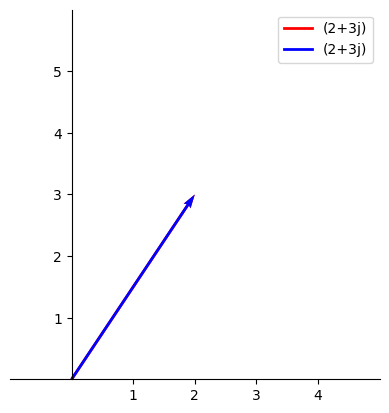

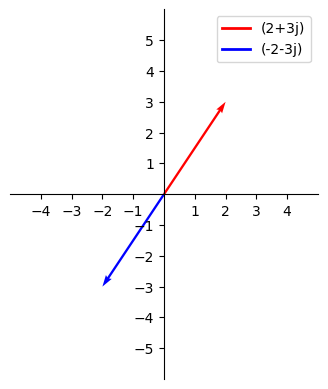

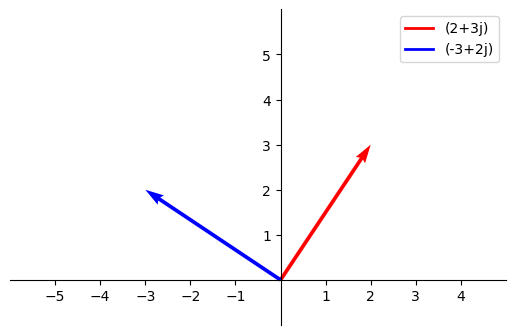

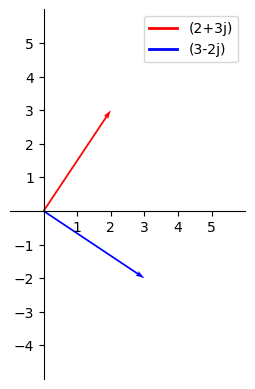

In [29]:
z = 2 + 3j
plot_complex_numbers([z, z * 1], ["red", "blue"])
plot_complex_numbers([z, z * -1], ["red", "blue"])
plot_complex_numbers([z, z * 1j], ["red", "blue"])
plot_complex_numbers([z, z * -1j], ["red", "blue"])

So, multiplication by $i$ is equivalent to 90-degree rotation. We can actually see the following equivalence relationships between multiplying numbers and rotation about the origin:

| Real | Imaginary | Result rotation |
|------|-----------|-----------------|
| 1    | 0         | $0^\circ$       |
| 0    | 1         | $90^\circ$      |
| -1   | 0         | $180^\circ$     |
| 0    | -1        | $270^\circ$     |

Once again, we see the power of abstraction and algebra in practice. We know that complex numbers and 2D vectors are equivalent. Now we see something more: addition and multiplication are equivalent to translation (movement) and rotation!

Let's test the multiplication some more. We can see the resulting vector is the sum of the original vectors, but *scaled and rotated*:

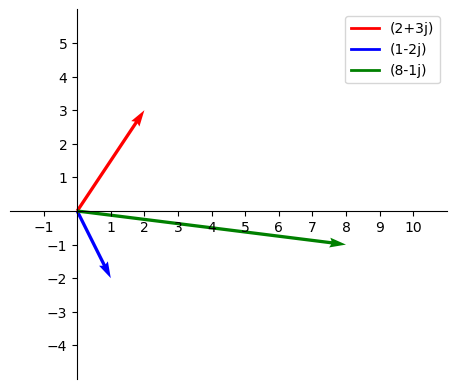

In [30]:
z1 = 2 + 3j
z2 = 1 - 2j
plot_complex_numbers([z1, z2, z1 * z2], ["red", "blue", "green"])

\* **Bonus:** How do **complex numbers** and **rotations** relate? 

### Problem 4. Fundamental Theorem of Algebra
Consider a polynomial like $x^4 - 2x^2 + 1$. How many roots does it have? Try factoring it out, or just find the solutions using `numpy` or `sympy`. Plot them as dots (on the complex plain), or as their corresponding radius-vectors.

Now, try out the solutions to $x^3$, $x^4$, and $x^5$.

Try out different polynomials with real coefficients, or higher degrees (try out 5th, 6th, etc. - just to get a feel). What do you observe about their roots? What do you think about the _geometry_ of the visualization?

In [31]:
def plot_roots(coefficients, colors=["blue", "green", "yellow"]):
    p = np.polynomial.Polynomial(coef=coefficients)
    roots = p.roots()

    real_roots = roots.real
    imag_roots = roots.imag
    print("Real Roots:", real_roots)
    print("Imaginary Roots:", imag_roots)
    
    zeros = [0] * len(roots)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(real_roots, imag_roots, s=60, c="red")
    plt.quiver(zeros, zeros, real_roots, imag_roots, angles = "xy", scale_units = "xy", scale = 1, color = colors)
    
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_xticks([t for t in ax.get_xticks() if t != 0.00])
    ax.set_yticks([t for t in ax.get_yticks() if t != 0.00])
    plt.title("Roots in the Complex Plane")
    
    plt.show()

Real Roots: [-1. -1.  1.  1.]
Imaginary Roots: [-2.46217318e-08  2.46217318e-08 -1.86299476e-08  1.86299476e-08]


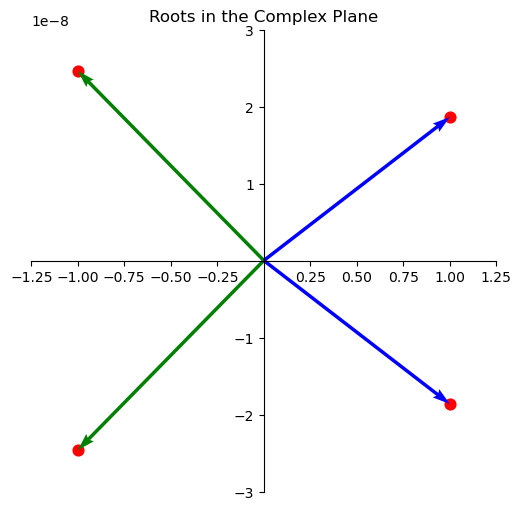

In [32]:
plot_roots([1, 0, -2, 0, 1], ["green", "green", "blue", "blue"])

In [33]:
x = sympy.symbols('x')
sympy.roots(x**4 - 2 * x**2 + 1)

{1: 2, -1: 2}

Let's test with few polynomials..

Simple ones:<br>
* $x^5 - 1$
* $x^6 + 1$
* $x^7 - x$
* $x^8 - 16$

"Random" real coefficient polynomials:<br>
* $x^5 - 3x^3 + x^2 - 4$
* $2x^6 - x^4 + 7x - 1$
* $x^7 + x^5 - 10x^3 + 2$

Ones with repeated roots:<br>
* $(x - 2)^3(x + 1)^2$
* $(x^2 + 1)^2(x - 4)$

Interesting Geometry:<br>
* Roots of unity: $x^n - 1$  -> evenly spaced on a circle
* Cyclotomic style: $x^n + 1$

4th degree - 4 roots
Real Roots: [-1.00000000e+00  6.44695442e-17  6.44695442e-17  1.00000000e+00]
Imaginary Roots: [ 0. -1.  1.  0.]


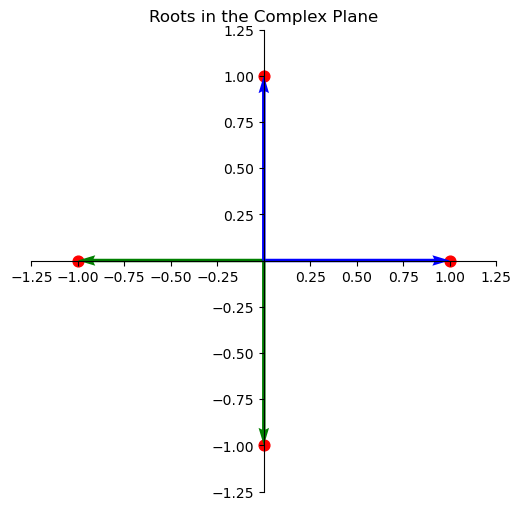

{-1: 1, 1: 1, -I: 1, I: 1}

In [94]:
print("4th degree - 4 roots")
plot_roots([-1, 0, 0, 0, 1], ["green", "green", "blue", "blue"])
x = sympy.symbols('x')
sympy.roots(x**4 - 1)

5th degree - 5 roots
Real Roots: [-0.80901699 -0.80901699  0.30901699  0.30901699  1.        ]
Imaginary Roots: [-0.58778525  0.58778525 -0.95105652  0.95105652  0.        ]


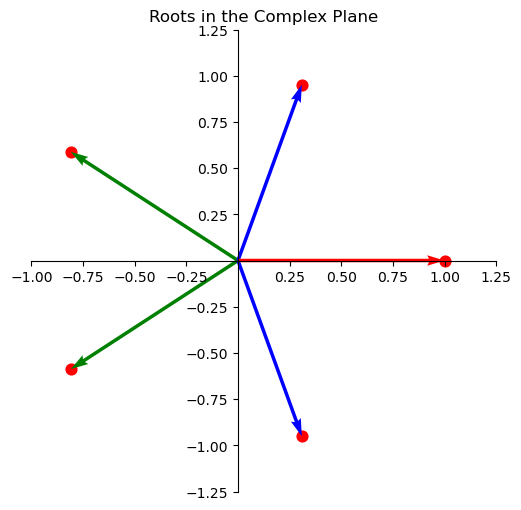

{1: 1,
 -sqrt(5)/4 - 1/4 - I*sqrt(5/8 - sqrt(5)/8): 1,
 -sqrt(5)/4 - 1/4 + I*sqrt(5/8 - sqrt(5)/8): 1,
 -1/4 + sqrt(5)/4 - I*sqrt(sqrt(5)/8 + 5/8): 1,
 -1/4 + sqrt(5)/4 + I*sqrt(sqrt(5)/8 + 5/8): 1}

In [95]:
# Simple polynomials
# 5th degree - 5 roots
print("5th degree - 5 roots")
plot_roots([-1, 0, 0, 0, 0, 1], ["green", "green", "blue", "blue", "red"])
sympy.roots(x**5 - 1)

6th degree - 6 roots
Real Roots: [-1.  -0.5 -0.5  0.5  0.5  1. ]
Imaginary Roots: [ 0.        -0.8660254  0.8660254 -0.8660254  0.8660254  0.       ]


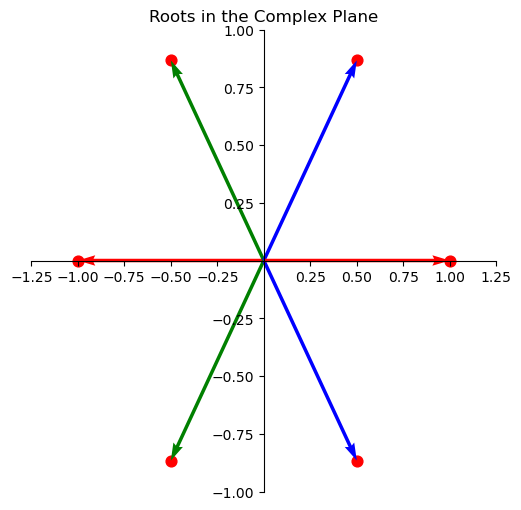

{-1: 1,
 1: 1,
 -1/2 - sqrt(3)*I/2: 1,
 -1/2 + sqrt(3)*I/2: 1,
 1/2 - sqrt(3)*I/2: 1,
 1/2 + sqrt(3)*I/2: 1}

In [35]:
# 6th degree - 6 roots
print("6th degree - 6 roots")
plot_roots([-1, 0, 0, 0, 0, 0, 1], ["red", "green", "green", "blue", "blue", "red"])
sympy.roots(x**6 - 1)

7th degree - 7 roots
Real Roots: [-1.  -0.5 -0.5  0.   0.5  0.5  1. ]
Imaginary Roots: [ 0.        -0.8660254  0.8660254  0.        -0.8660254  0.8660254
  0.       ]


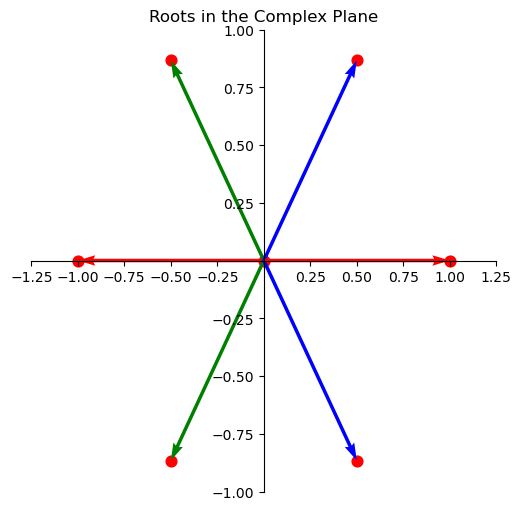

{-1: 1,
 1: 1,
 -1/2 - sqrt(3)*I/2: 1,
 -1/2 + sqrt(3)*I/2: 1,
 1/2 - sqrt(3)*I/2: 1,
 1/2 + sqrt(3)*I/2: 1,
 0: 1}

In [36]:
# 7th degree - 7 roots
print("7th degree - 7 roots")
plot_roots([0, -1, 0, 0, 0, 0, 0, 1], ["red", "green", "green", "blue", "blue", "blue", "red"])
sympy.roots(x**7 - x)

8th degree - 8 roots
Real Roots: [-1.41421356e+00 -1.00000000e+00 -1.00000000e+00  5.92680582e-16
  5.92680582e-16  1.00000000e+00  1.00000000e+00  1.41421356e+00]
Imaginary Roots: [ 0.         -1.          1.         -1.41421356  1.41421356 -1.
  1.          0.        ]


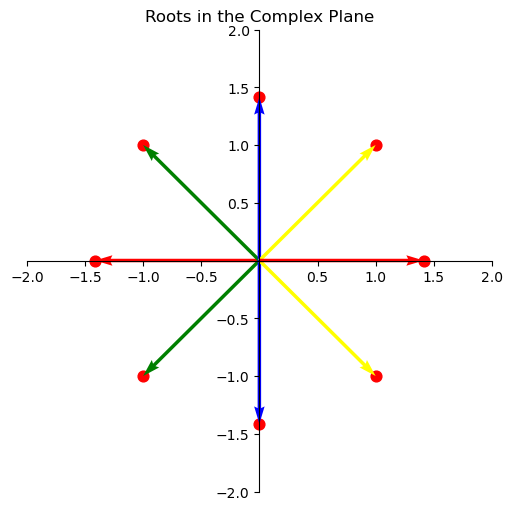

{-sqrt(2): 1,
 sqrt(2): 1,
 -1 - I: 1,
 -1 + I: 1,
 -sqrt(2)*I: 1,
 sqrt(2)*I: 1,
 1 - I: 1,
 1 + I: 1}

In [37]:
# 8th degree - 8 roots
print("8th degree - 8 roots")
plot_roots([-16, 0, 0, 0, 0, 0, 0, 0, 1], ["red", "green", "green", "blue", "blue", "yellow", "yellow", "red"])
sympy.roots(x**8 - 16)

In [38]:
#"Random" real coefficient polynomials:<br>
#* $x^5 - 3x^3 + x^2 - 4$
#* $2x^6 - x^4 + 7x - 1$
#* $x^7 + x^5 - 10x^3 + 2$

sympy.nroots(x**5 - 3*x**3 + x**2 - 4)

[-1.64662264357989,
 -1.17354699420693,
 1.77528286604378,
 0.522443385871522 - 0.945013787019152*I,
 0.522443385871522 + 0.945013787019152*I]

In [39]:
sympy.nroots(2*x**6 - x**4 + 7*x - 1)

[-1.39084985382601,
 0.142914302792048,
 -0.447473702151945 - 1.15432290129005*I,
 -0.447473702151945 + 1.15432290129005*I,
 1.07144147766892 - 0.70228349023698*I,
 1.07144147766892 + 0.70228349023698*I]

In [40]:
sympy.nroots(x**7 + x**5 - 10*x**3 + 2)

[-1.66392897677487,
 0.594434208253996,
 1.62091306857321,
 -0.287093739907532 - 0.504448722561595*I,
 -0.287093739907532 + 0.504448722561595*I,
 0.0113845898813665 - 1.92425812521849*I,
 0.0113845898813665 + 1.92425812521849*I]

Interesting Geometry:<br>
* Roots of unity: $x^n - 1$  -> evenly spaced on a circle
* Cyclotomic style: $x^n + 1$

Real Roots: [-0.99675731 -0.99675731 -0.97094182 -0.97094182 -0.91997944 -0.91997944
 -0.84519009 -0.84519009 -0.74851075 -0.74851075 -0.63244538 -0.63244538
 -0.5        -0.5        -0.35460489 -0.35460489 -0.20002569 -0.20002569
 -0.04026594 -0.04026594  0.12053668  0.12053668  0.27821746  0.27821746
  0.42869256  0.42869256  0.56806475  0.56806475  0.69272435  0.69272435
  0.79944276  0.79944276  0.88545603  0.88545603  0.94853644  0.94853644
  0.98705026  0.98705026  1.        ]
Imaginary Roots: [-0.08046657  0.08046657 -0.23931566  0.23931566 -0.39196661  0.39196661
 -0.53446583  0.53446583 -0.66312266  0.66312266 -0.77460496  0.77460496
 -0.8660254   0.8660254  -0.93501624  0.93501624 -0.97979065  0.97979065
 -0.999189    0.999189   -0.99270887  0.99270887 -0.96051811  0.96051811
 -0.90345043  0.90345043 -0.82298387  0.82298387 -0.72120245  0.72120245
 -0.60074226  0.60074226 -0.46472317  0.46472317 -0.31666799  0.31666799
 -0.16041128  0.16041128  0.        ]


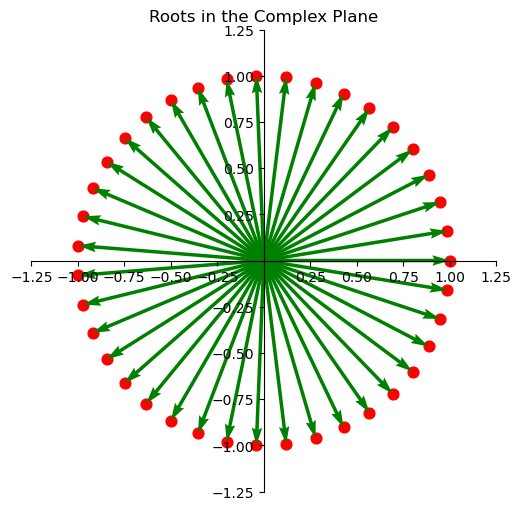

In [41]:
plot_roots([-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], colors=["green"])

Real Roots: [-1.         -0.98705026 -0.98705026 -0.94853644 -0.94853644 -0.88545603
 -0.88545603 -0.79944276 -0.79944276 -0.69272435 -0.69272435 -0.56806475
 -0.56806475 -0.42869256 -0.42869256 -0.27821746 -0.27821746 -0.12053668
 -0.12053668  0.04026594  0.04026594  0.20002569  0.20002569  0.35460489
  0.35460489  0.5         0.5         0.63244538  0.63244538  0.74851075
  0.74851075  0.84519009  0.84519009  0.91997944  0.91997944  0.97094182
  0.97094182  0.99675731  0.99675731]
Imaginary Roots: [ 0.         -0.16041128  0.16041128 -0.31666799  0.31666799 -0.46472317
  0.46472317 -0.60074226  0.60074226 -0.72120245  0.72120245 -0.82298387
  0.82298387 -0.90345043  0.90345043 -0.96051811  0.96051811 -0.99270887
  0.99270887 -0.999189    0.999189   -0.97979065  0.97979065 -0.93501624
  0.93501624 -0.8660254   0.8660254  -0.77460496  0.77460496 -0.66312266
  0.66312266 -0.53446583  0.53446583 -0.39196661  0.39196661 -0.23931566
  0.23931566 -0.08046657  0.08046657]


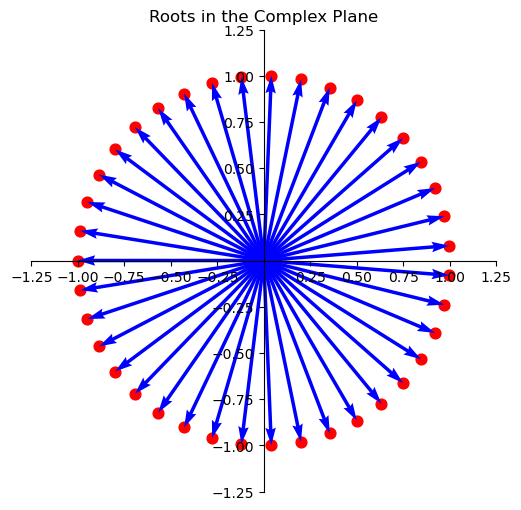

In [42]:
plot_roots([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], colors=["blue"])

### Problem 5. Recursion and Fractals
<img src="recursion.jpg" style="max-height: 230px" />

> "To understand recursion, you first need to understand recursion."

There are three main parts to a recursive function:
1. Bottom - when the recursion should finish
2. Operation - some meaningful thing to do
3. Recursive call - calling the same function
4. Clean-up - returning all data to its previous state (this reverses the effect of the operation)

Let's do one of the most famous recursion examples. The most trivial function to recreate is the **factorial**. Derive (or look up) a recurrent definition of the factorial of a non-negative integer and implement it.

**There is a one-to-one correspondence between loops and recursion.** Use this correspondence to create an iterative definition (one which uses loops) and compare both. Test that they return the same results.

**Note:** Think how Python handles very large integers.

In [43]:
def factorial_recursive(n):
    """
    Computes the factorial of a non-negative number n (using recursion)
    """
    if n < 1:
        return 1
    else:
        return n * factorial_recursive(n - 1)

def factorial_iterative(n):
    """
    Computes the factorial of a non-negative number n (using iteration)
    """
    sum = 1
    while n > 0:
        sum *= n
        n -= 1

    return sum

In [44]:
factorial_recursive(6)

720

In [45]:
factorial_iterative(6)

720

In [46]:
def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

In [47]:
fibonacci_recursive(6)

8

#### Endless sequences
A very famous recursive definition gives us natural numbers (by (the Peano axioms)[https://en.wikipedia.org/wiki/Peano_axioms]). How can we recreate this using Python? Obviously, we cannot put an infinite sequence in a list. However, we can do something else: define the entire sequence and take only parts of it.

Devise a way to define all natural numbers, using the function signature below. Use this to define a smaller, but just as infinite, sequence of even numbers. **Hint:** If you're very stuck, think about the problem hard and it will finally _yield_ to your efforts.

In [48]:
import itertools

def nat():
    """Returns all even numbers"""
    n = 1
    while True:
        yield n
        n += 1
    
def even():
    """Returns all even numbers"""
    for n in nat():
        yield n * 2

In [49]:
print('nat()', list(itertools.islice(nat(), 100)))
print('even()',list(itertools.islice(even(), 100)))
print("nat() list comprehension", [n for n, _ in zip(range(1, 101), nat())])

nat() [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
even() [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200]
nat() list comprehension [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3

Use the approach above to rewrite the factorial function in a "lazy" way.

In [50]:
def factorial_new(n):
    gen = nat()
    sum = 1
    while n >= 1:
        sum *= next(gen)
        n -= 1
    return sum

In [51]:
factorial_new(4)

24

Use **the same approach** to return the Fibonacci sequence - another famous one in mathematics. Given `n`, produce all Fibonacci numbers from $F_1$ up to $F_n$, inclusive.

In [52]:
def fibonacci(n):
    seq = [1, 1]
    gen = nat()
    while next(gen) + 2 <= n:
        seq.append(seq[len(seq) - 1] + seq[len(seq) - 2])
    return seq[len(seq) - 1]  

In [53]:
fibonacci(6)

8

#### The Mandelbrot set
Now, let's get to something more beefy. The Mandelbrot set is defined by repeatedly squaring complex numbers. It turns out that it produces a **fractal** - a self-similar structure. Follow a tutorial to create (and possibly visualize) the Mandelbrot set. I think [this one](https://medium.com/swlh/visualizing-the-mandelbrot-set-using-python-50-lines-f6aa5a05cf0f) is a good starting point.

In [54]:
from PIL import Image
import colorsys
import math
import os

In [55]:
#frame parameters
width = 1000 #pixels
x = -0.65
y = 0
xRange = 3.4
aspectRatio = 4/3 

In [56]:
precision = 500

In [57]:
height = round(width / aspectRatio)
yRange = xRange / aspectRatio
minX = x - xRange / 2
maxX = x + xRange / 2
minY = y - yRange / 2
maxY = y + yRange / 2

In [58]:
# Time to create our Image object. Using PIL’s Image class, we can create a new image with desired dimensions and a black background. 
# Then, we extract the pixels into an array we can directly manipulate with color changes.
img = Image.new('RGB', (width, height), color = 'black')
pixels = img.load()

In [59]:
def logColor(distance, base, const, scale):
    color = -1 * math.log(distance, base)
    rgb = colorsys.hsv_to_rgb(const + scale * color,0.8,0.9)
    return tuple(round(i * 255) for i in rgb)

In [60]:
def powerColor(distance, exp, const, scale):
    color = distance**exp
    rgb = colorsys.hsv_to_rgb(const + scale * color,1 - 0.6 * color,0.9)
    return tuple(round(i * 255) for i in rgb)

In [61]:
for row in range(height):
    for col in range(width):
        x = minX + col * xRange / width
        y = maxY - row * yRange / height
        oldX = x
        oldY = y
        for i in range(precision + 1):
            a = x*x - y*y #real component of z^2
            b = 2 * x * y #imaginary component of z^2
            x = a + oldX #real component of new z
            y = b + oldY #imaginary component of new z
            if x*x + y*y > 4:
                break
        if i < precision:
            distance = (i + 1) / (precision + 1)
            rgb = powerColor(distance, 0.2, 0.27, 1.0)
            pixels[col,row] = rgb
        index = row * width + col + 1
        if index % 100000 == 0 or index == 750000:
            print("{} / {}, {}%".format(index, width * height, round(index / width / height * 100 * 10) / 10))

100000 / 750000, 13.3%
200000 / 750000, 26.7%
300000 / 750000, 40.0%
400000 / 750000, 53.3%
500000 / 750000, 66.7%
600000 / 750000, 80.0%
700000 / 750000, 93.3%
750000 / 750000, 100.0%


In [62]:
img.save('output.png')
os.system('open output.png')

1

#### * Optional problem
Try to recreate a Lindermeyer system (also known as **L-system**, [source](https://en.wikipedia.org/wiki/L-system)). These are systems created via a series of replacement rules. 

#### Algae
Lindenmayer's original L-system for modelling the growth of algae.

In [63]:
def L_system_algae(n, axiom='A'):
    """
    Lindenmayer's original L-system for modelling the growth of algae.
    Variables -> A, B
    Constants: none
    Axiom: A
    Rules: (A -> AB), (B -> A)

    Parameters:
    n -> number of iterations
    axiom -> starter point, default = 'A'
    """
    system = [axiom]
    for i in range(1, n):
        new_row = ""
        for l in system[i - 1]:
            if l == 'A':
                new_row += 'AB'
            elif l == 'B':
                new_row += 'A'
        system.append(new_row)

    return system

In [64]:
system = L_system_algae(6)
for i, row in enumerate(system):
    print("n{}: {}".format(i, row))

n0: A
n1: AB
n2: ABA
n3: ABAAB
n4: ABAABABA
n5: ABAABABAABAAB


#### Algae Recursive

In [65]:
def L_system_algae_recursive(n, axiom='A', current_iteration = 0):
    """
    Lindenmayer's original L-system for modelling the growth of algae.
    Recursive approach.
    
    Variables -> A, B
    Constants: none
    Axiom: A
    Rules: (A -> AB), (B -> A)

    Parameters:
    n -> number of iterations
    axiom -> starter point, default = 'A'
    current_iteration -> self explanatory, default = 0
    """

    print("n{}: {}".format(current_iteration, axiom))
    n -= 1
    if n > 0:
        new_axiom = ""
        current_iteration += 1
        for l in axiom:
            if l == 'A':
                new_axiom += 'AB'
            elif l == 'B':
                new_axiom += 'A'
        L_system_algae_recursive(n, axiom=new_axiom, current_iteration=current_iteration)

In [66]:
L_system_algae_recursive(6)

n0: A
n1: AB
n2: ABA
n3: ABAAB
n4: ABAABABA
n5: ABAABABAABAAB


#### Fractal "binary" tree

In [67]:
def L_system_binary_tree_recursive(n, axiom='0', current_iteration=0):
    """
    The shape is built by recursively feeding the axiom through the production rules. 
    Each character of the input string is checked against the rule list to determine 
    which character or string to replace it with in the output string. 
    In this example, a '1' in the input string becomes '11' in the output string, 
    while '[' remains the same.
    Note: Recursive approach to the problem.
    
    Variables: 0, 1
    Constants: "[", "]"
    Axiom: 0
    Rules: (1 -> 11), (0 -> 1[0]0)

    Parameters:
    n -> number of iterations
    axiom -> starter point, default = '0'
    current_iteration -> self explanatory, default = 0
    """
    print("n{}: {}".format(current_iteration, axiom))
    n -= 1
    if n > 0:
        new_axiom = ""
        current_iteration += 1
        for l in axiom:
            if l == '1':
                new_axiom += '11'
            elif l == '0':
                new_axiom += '1[0]0'
            elif l == '[' or l == ']':
                new_axiom += l
        L_system_binary_tree_recursive(n, axiom=new_axiom, current_iteration=current_iteration)

In [68]:
L_system_binary_tree_recursive(5)

n0: 0
n1: 1[0]0
n2: 11[1[0]0]1[0]0
n3: 1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0
n4: 11111111[1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0]1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0


In [69]:
def L_system_recursive_two(axiom, rules, n):
    # Base case: return list containing only the axiom
    if n == 0:
        return [axiom]

    # Rewrite the current axiom
    new_axiom = "".join(rules.get(ch, ch) for ch in axiom)

    # Recursively build the list of the remaining generations
    rest = L_system_recursive_two(new_axiom, rules, n - 1)

    # Return current generation + all next generations
    return [axiom] + rest


In [70]:
for i, generation in enumerate(L_system_recursive_two('A', {'A': 'AB', 'B': 'A'}, 5)):
    print("n{}: {}".format(i, generation))

n0: A
n1: AB
n2: ABA
n3: ABAAB
n4: ABAABABA
n5: ABAABABAABAAB


In [71]:
def L_system_binary_tree_recursive_two(axiom, rules, n):
    if n == 0:
        return [axiom]

    new_axiom = "".join(rules.get(ch, ch) for ch in axiom)

    rest = L_system_binary_tree_recursive_two(new_axiom, rules, n-1)

    return [axiom] + rest

In [72]:
generations = L_system_binary_tree_recursive_two('0', {'1': '11', '0': '1[0]0', '[': '[', ']': ']'}, 5)

for i, gen in enumerate(generations):
    print("n{}: {}".format(i, gen))

n0: 0
n1: 1[0]0
n2: 11[1[0]0]1[0]0
n3: 1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0
n4: 11111111[1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0]1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0
n5: 1111111111111111[11111111[1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0]1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0]11111111[1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0]1111[11[1[0]0]1[0]0]11[1[0]0]1[0]0


### Problem 6. Run-length Encoding
One application of algebra and basic math can be **compression**. This is a way to save data in less space than it originally takes. The most basic form of compression is called [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding).

Write a function that encodes a given text. Write another one that decodes.

We can see that RLE is not very useful in the general case. But it can be extremely useful if we have very few symbols. An example of this can be DNA and protein sequences. DNA code, for example, has only 4 characters.

Test your encoding and decoding functions on a DNA sequence (you can look up some on the Internet). Measure how much your data is compressed relative to the original.

In [73]:
def encode(text):
    """
    Returns the run-length encoded version of the text
    (numbers after symbols, length = 1 is skipped)
    """
    symbol_counter = 0
    old_symbol = ''
    encoded_text = ''
    
    for i, l in enumerate(text):
        if i == 0:
            old_symbol = l
            symbol_counter += 1
            continue
        elif i + 1 == len(text):
            if l == old_symbol:
                symbol_counter += 1
                encoded_text += '{}{}'.format(l, symbol_counter)
                break
            elif l != old_symbol:
                encoded_text += '{}{}'.format(old_symbol, symbol_counter)
                encoded_text += l
                break
        
        if l == old_symbol:
            symbol_counter += 1
        elif l != old_symbol:
            if symbol_counter == 1:
                encoded_text += old_symbol
            else:
                encoded_text += '{}{}'.format(old_symbol, symbol_counter)
            symbol_counter = 1
            old_symbol = l
        
    return encoded_text
        

def encode_second_try(text):
    if not text:
        return ''

    encoded = []
    count = 1
    prev = text[0]

    for char in text[1:]:
        if char == prev:
            count += 1
        else:
            encoded.append(prev if count == 1 else f"{prev}{count}")
            prev = char
            count = 1
    encoded.append(prev if count == 1 else f"{prev}{count}")

    return "".join(encoded)

def decode(text):
    """
    Decodes the text using run-length encoding
    """
    number_set = {'1', '2', '3', '4', '5', '6', '7', '8', '9'}
    decoded_text = ''
    for i, l in enumerate(text):
        if i + 1 == len(text):
            if l not in number_set:
                decoded_text += l
            else:
                break
        if l in number_set:
            continue
        elif text[i + 1] not in number_set:
            decoded_text += l
        elif text[i + 1] in number_set:
            decoded_text += l * int(text[i + 1])
    
    return decoded_text

def decode_second_try(text):
    decoded = []
    i = 0
    length = len(text)

    while i < length:
        char = text[i]
        i += 1

        if i < length and text[i].isdigit():
            digits = [text[i]]
            count = 1
            while True:
                if i + count < length:
                    if text[i + count].isdigit():
                        digits.append(text[i + count])
                        count += 1
                    else:
                        break
                else:
                    break
            number = int("".join(digits))
            decoded.append(char * number)
            i += count
            continue

        decoded.append(char)
        
    return "".join(decoded)      

In [74]:
# Tests
# Test that the functions work on their own
print(encode("AABCCCDEEEE"))
assert encode("AABCCCDEEEE") == "A2BC3DE4"
print(encode("AABCCCDEEEF"))
assert encode("AABCCCDEEEF") == "A2BC3DE3F"
print(decode("A2BC3DE4"))
assert decode("A2BC3DE4") == "AABCCCDEEEE"


print(encode_second_try("AABCCCDEEEE"))
assert encode_second_try("AABCCCDEEEE") == "A2BC3DE4"
print(encode_second_try("AABCCCDEEEF"))
assert encode_second_try("AABCCCDEEEF") == "A2BC3DE3F"
print(decode_second_try("A2BC3DE4"))
assert decode_second_try("A2BC3DE4") == "AABCCCDEEEE"

# Test that the functions really invert each other
assert decode(encode("AABCCCDEEEE")) == "AABCCCDEEEE"
assert encode(decode("A2BC3DE4")) == "A2BC3DE4"

assert decode(encode_second_try("AABCCCDEEEE")) == "AABCCCDEEEE"
assert encode(decode_second_try("A2BC3DE4")) == "A2BC3DE4"

A2BC3DE4
A2BC3DE3F
AABCCCDEEEE
A2BC3DE4
A2BC3DE3F
AABCCCDEEEE


### * Problem 7. Function Invertibility and Cryptography
As we already saw, some functions are able to be inverted. That is, if we know the output, we can see what input generated it directly. This is true if the function is **one-to-one correspondence** (bijection).

However, not all functions are created the same. Some functions are easy to compute but their inverses are extremely difficult. A very important example is **number factorization**. It's relatively easy (computationally) to multiply numbers but factoring them is quite difficult. Let's run an experiment.

We'll need a function to generate random n-bit numbers. One such function can be found in the `random` package:
```python
import random
random.getrandbits(n_bits)
```

It works perfectly for this example. However, to make a point about random generators and their security, we may want to import a similar function from the `secrets` module instead. If you're interested, you can look up "cryptographic pseudo-random number generators" / "PRNGs".
```python
import secrets
secrets.randbits(n_bits)

```

We could, of course, write our factorization by hand but we'll use `sympy`
```python
from sympy.ntheory import factorint
factorint(1032969399047817906432668079951) # {3: 2, 79: 1, 36779: 1, 7776252885493: 1, 5079811103: 1}
```

This function returns a `dict` where the keys are the factors, and the values - how many times they should be multiplied.

We'll also need a tool to accurately measure performance. Have a look at [this one](https://docs.python.org/3/library/time.html#time.time) for example.

Specify a sequence of bit lengths, in increasing order. For example, you might choose something like `[10, 20, 25, 30, 32, 33, 35, 38, 40]`. Depending on your computer's abilities you can go as high as you want. For each bit length, generate a number. See how much time it takes to factor it. Then see how much time it takes to multiply the factors. Be careful how you measure these. You shouldn't include the number generation (or any other external functions) in your timing.

In order to have better accuracy, don't do this once per bit length. Do it, for example, five times, and average the results.

Plot all multiplication and factorization times as a function of the number of bits. You should see that factorization is much, much slower. If you don't see this, just try larger numbers :D.

In [75]:
import secrets
random_bit = secrets.randbits(10)

In [76]:
from sympy.ntheory import factorint
factorint(100)

{2: 2, 5: 2}

numbers: [929, 476291, 24852367, 802633608, 427184655, 4224203568, 12777063854, 186213251236, 920783053268, 1157598574186, 97024799804635, 4772113362869, 54327537190201, 186883980722341]
time:   [1.8358230590820312e-05, 9.775161743164062e-06, 0.0001373291015625, 1.430511474609375e-05, 0.00011014938354492188, 8.821487426757812e-06, 0.00011563301086425781, 0.00074005126953125, 0.00012040138244628906, 0.00012946128845214844, 0.00016570091247558594, 0.0017254352569580078, 0.00014352798461914062, 0.0009493827819824219]
dictionaries:
 [{929: 1}, {79: 1, 6029: 1}, {24852367: 1}, {2: 3, 3: 2, 7: 1, 61: 1, 26107: 1}, {3: 1, 5: 1, 28478977: 1}, {2: 4, 3: 3, 13: 1, 29: 1, 37: 1, 701: 1}, {2: 1, 127: 1, 50303401: 1}, {2: 2, 149: 1, 5147: 1, 60703: 1}, {2: 2, 13: 1, 53: 1, 334101253: 1}, {2: 1, 578799287093: 1}, {5: 1, 751: 1, 1009: 1, 25608353: 1}, {17: 1, 266239: 1, 1054363: 1}, {11: 1, 229: 1, 21567104879: 1}, {7: 1, 39779: 1, 671150897: 1}]


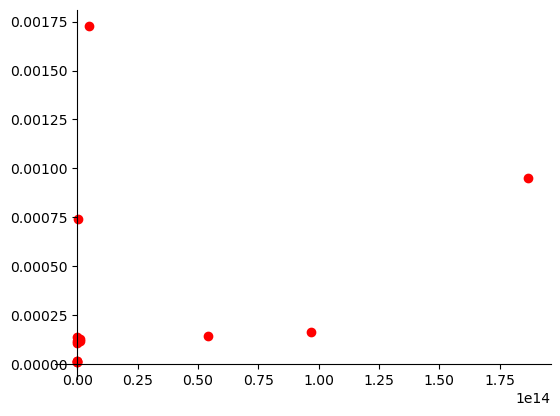

In [77]:
import time

bits_to_test = [10, 20, 25, 30, 32, 33, 35, 38, 40, 41, 47, 45, 48, 50]
time_elapsed = [0] * len(bits_to_test)
factor_list = []

#for i in range(5):
random_numbers = [secrets.randbits(r) for r in bits_to_test]

for i, n in enumerate(random_numbers):
    start = time.time()
    factor_dict = factorint(n)
    stop = time.time()
    time_elapsed[i] = abs(start - stop)
    factor_list.append(factor_dict)

print('numbers:', random_numbers)
print('time:  ', time_elapsed)
print('dictionaries:\n', factor_list)

plt.scatter(random_numbers, time_elapsed, c='r')
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

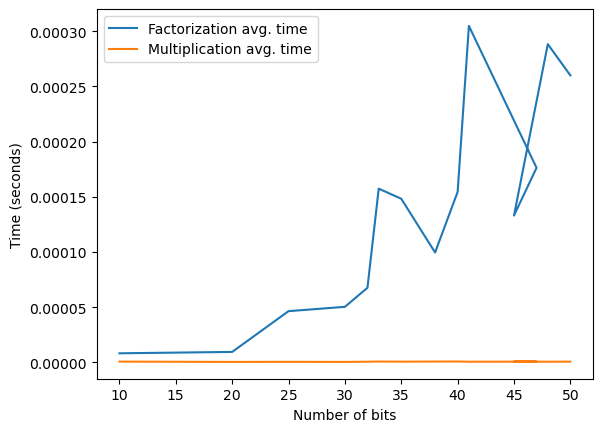

In [78]:
bits_to_test = [10, 20, 25, 30, 32, 33, 35, 38, 40, 41, 47, 45, 48, 50]

factor_times = []
multiply_times = []
n_trials = 5

for bits in bits_to_test:
    ftimes = []
    mtimes = []

    for _ in range(n_trials):
        # pseudo-random generated number
        prg_n = secrets.randbits(bits)

        # factorization time
        start = time.time()
        factor = factorint(prg_n)
        end = time.time()
        ftimes.append(end - start)

        # multiplication time
        factors_expanded = []
        for k,v in factor.items():
            factors_expanded.extend([k] * v)
        start = time.time()
        math.prod(factors_expanded)
        end = time.time()
        mtimes.append(end - start)

    factor_times.append(sum(ftimes) / n_trials)
    multiply_times.append(sum(mtimes) / n_trials)

# Plotting (bits, time) for factorization and multiplication
plt.plot(bits_to_test, factor_times, label="Factorization avg. time")
plt.plot(bits_to_test, multiply_times, label="Multiplication avg. time")
plt.xlabel("Number of bits")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

### * Problem 8. Diffie - Hellman Key Exchange Simulation
As we already saw, there are functions which are very easy to compute in the "forward" direction but really difficult (computationally) to invert (that is, determine the input from the output). There is a special case: the function may have a hidden "trap door". If you know where that door is, you can invert the function easily. This statement is at the core of modern cryptography.

Look up **Diffie - Hellman key exchange** (here's a [video](https://www.youtube.com/watch?v=cM4mNVUBtHk) on that but feel free to use anything else you might find useful).

Simulate the algorithm you just saw. Generate large enough numbers so the difference is noticeable (say, factoring takes 10-15 seconds). Simulate both participants in the key exchange. Simulate an eavesdropper.

First, make sure after both participants run the algorithm, they have *the same key* (they generate the same number).

Second, see how long it takes for them to exchange keys.

Third, see how long it takes the eavesdropper to arrive at the correct shared secret.

You should be able to see **the power of cryptography**. In this case, it's not that the function is irreversible. It can be reversed, but it takes a really long time (and with more bits, we're talking billions of years). However, if you know something else (this is called a **trap door**), the function becomes relatively easy to invert.

#### Explanation
Before I start coding, I need to explain some things, mostly to myself.

I'll use cryptography.hazmat.primitives.asymmetric.dh to generate Diffie Hellman (dh) parameters.
<br>The parameters are:
* p -> Key size, a large prime modulus. In our case, we'll use 2024 bits long prime number.
* g -> A generator, also called the base. A generator g is a number such that repeated exponentiation of g covers the group of $Z_p$ (or a large subgroup).
* $\mathbb{Z}_p$ -> $\mathbb{Z}$ is the set of all integers. $_p$ is modulo p, therefore:
  $$\mathbb{Z}_p = \{1, 2, 3,...,p-1\}$$

This pretty much means "Generate a 2024-bit prime number such that g is a valid generator for a large subgroup of $\mathbb{Z}_p$"

In [79]:
from cryptography.hazmat.primitives.asymmetric import dh

# The public part of the Diffie Hellman's algorithm
# g = 2
# p = 2024-bit long prime
start = time.time()
parameters = dh.generate_parameters(
    generator = 2,
    key_size = 2048
)
end = time.time()

print(end - start)

# Note - it takes somewhere between 2.5 seconds to up to a minute, 
# and i believe the min/max time window is larger than what I got just from few examples.

9.907180547714233


In [80]:
p_n = parameters.parameter_numbers()
p = p_n.p
g = p_n.g

In [81]:
print(p)
print(g)

30007414815008214152794610290419819598381490171087687245120004749336980232040611755968845327930873436895614057670743036229634014281172576288158016981399030811756526706879006266006853025117072011613504441906905479805226637098936943519100331375843335906749783711785088421679737728580967578607405841288116277678460574956702859407936328324181460503971971801947627879994407413657192828384601493860220912697814239537932919326626566872084018045370097365775468282669778386128109185562620010617800821650846658642804472438664218240657101646924646686414273372699629091824926117831687353924816526859047015879220841599402393230847
2


In [82]:
print("p bit length", p.bit_length())

p bit length 2048


In [83]:
print("p bit count", p.bit_count())

p bit count 1035


Since the task involves to see how long it takes the eavesdropper to arrive at the correct shared secret, i'll work with simple numbers.

To start, we need:
* the public values - p, g.
* the private variables - a, b (from Alice - a, and Bob - b)

In [84]:
# Quick test on Fermat's little theorem -> g**(p - 1) % p == 1, where p MUST be a prime number for this to work!
print("Fermat's Little Theorem proof:")
print("Testing with p=7:", 2 ** (7 - 1) % 7)
print("Testing with p=3:", 2 ** (3 - 1) % 3)
print("Testing with p=17:", 2 ** (7 - 1) % 7)
print("Testing with p=13:", 2 ** (7 - 1) % 7)
print("Testing with p=11:", 2 ** (7 - 1) % 7)
print("Now let's test with some REALLY HUGE number:")
start = time.time()
print("Testing with p=170141183460469231731687303715884105727:", pow(2, 170141183460469231731687303715884105727 - 1, 170141183460469231731687303715884105727))
end = time.time()
print("Time used to compute p=170141183460469231731687303715884105727:", end - start)
print("Note: I'll even set a timer on this one, because so far it's taking forever to compute...")
print("Note 2: I couldn't compute it like the numbers above, got a memory error...Had to use pow().")
print("Note 3: Using pow() reduced the seemingly 'infinite' computing time (and a memory error) to a ~1e-4 seconds, which is amazing!")
print("\n\nHow cool is that? :)")

# I also want to test p-2 just for the simple prime examples 3, 7, 11, 13
print("\n\np-2 tests:")
print("Testing with p = 3:", 2 ** (3 - 2) % 3)
print("Testing with p = 7:", 2 ** (7 - 2) % 7)
print("Testing with p = 11:", 2 ** (11 - 2) % 11)
print("Testing with p = 13:", 2 ** (13 - 2) % 13)


Fermat's Little Theorem proof:
Testing with p=7: 1
Testing with p=3: 1
Testing with p=17: 1
Testing with p=13: 1
Testing with p=11: 1
Now let's test with some REALLY HUGE number:
Testing with p=170141183460469231731687303715884105727: 1
Time used to compute p=170141183460469231731687303715884105727: 9.036064147949219e-05
Note: I'll even set a timer on this one, because so far it's taking forever to compute...
Note 2: I couldn't compute it like the numbers above, got a memory error...Had to use pow().
Note 3: Using pow() reduced the seemingly 'infinite' computing time (and a memory error) to a ~1e-4 seconds, which is amazing!


How cool is that? :)


p-2 tests:
Testing with p = 3: 2
Testing with p = 7: 4
Testing with p = 11: 6
Testing with p = 13: 7


In [85]:
p = 1_000_003  # prime number, small enough to break quickly
g = 2

print(f"Public parameters:\n    p: {p}\n    g: {g}\n")

print("Private variables:")
# Alice
a = secrets.randbelow(p - 2) + 1  
# + 1 avoids 0, p-2 avoids p-1 -> always collapses to 1
# Fermat's little theorem -> g**(p - 1) % p == 1, true for every generator g and every prime p
# pow takes base, exp and modulus as parameters
start_alice = time.time()
A = pow(g, a, p)
start_alice = time.time()
print(f"  Alice's private variables:\n    a = {a}\n    A = {A}   => (g**a) % p\n     Time passed using pow(): {end - start}")

# For test purposes, I want to see the time difference between 
#start_test = time.time()
#A_test = (g ** a) % p
#end_test = time.time()
#print(f"A_test: {A_test}\nTime passed using maths only: {end_test - start_test}\nTime difference: {(end_test - start_test) - (end - start)}")
#print("Much, much faster using pow()!")

#Bob
b = secrets.randbelow(p - 2) + 1
start_bob = time.time()
B = pow(g, b, p)
end_bob = time.time()
print(f"  Bob's private variables:\n    b = {b}\n    B  = {B}   => (g**b) % p\n    Time passed using pow(): {end - start}")

# So now Alice and Bob exchange their new variables A and B and they become the new base.
# Let's also compute the time it takes for the exchange.
start = time.time()
alice_key = pow(B, a, p)
bob_key = pow(A, b, p)
end = time.time()

print("\n\nGenerated keys:")
print("  Alice's Key:", {alice_key})
print("  Bob's Key:", {bob_key})
print("  Key exchange time:", {end - start})
print("  Are they the same?:", alice_key == bob_key)

# Now let's try and brute force it...
# The hacker's name is Eve, some say it comes from evil...spooky!
# Nah, it comes from eavesdropper :) maybe...
print("\n\nEve's attacking...")
print("She's trying to find A, since it's public. A is alice's shared secret.")
print("By finding A, she can assume, that her x (pun intended) is Alice's secret variable.")
start = time.time()
eve_key = 0
eve_trials = 0
for x in range(1, p):
    eve_trials += 1
    if(pow(g, x, p) == A):
        eve_number = x
        break
end = time.time()
print("  Eve found the right key:", eve_key)
print(f"  Only after trying {eve_trials} times...")
print(f"  And it took her {end - start} seconds.")
print("\nTurns out Eve is pretty fast when the prime number is only 20 bits long...\nlet's try with a larger prime number below to test her skills...")

Public parameters:
    p: 1000003
    g: 2

Private variables:
  Alice's private variables:
    a = 47334
    A = 879700   => (g**a) % p
     Time passed using pow(): 9.036064147949219e-05
  Bob's private variables:
    b = 330863
    B  = 371776   => (g**b) % p
    Time passed using pow(): 9.036064147949219e-05


Generated keys:
  Alice's Key: {341996}
  Bob's Key: {341996}
  Key exchange time: {8.344650268554688e-05}
  Are they the same?: True


Eve's attacking...
She's trying to find A, since it's public. A is alice's shared secret.
By finding A, she can assume, that her x (pun intended) is Alice's secret variable.
  Eve found the right key: 0
  Only after trying 47334 times...
  And it took her 0.07468867301940918 seconds.

Turns out Eve is pretty fast when the prime number is only 20 bits long...
let's try with a larger prime number below to test her skills...


In [86]:
def dh_simple_keygen(g, p, a, b):
    """
    Compute the Diffie-Hellman shared key.

    Modular exponentiation is "commutative" in this sense:
        (g^a)^b % p == (g^b)^a % p
    because both evaluate to g^(a*b) % p.
    This allows Alice and Bob to compute the same shared key
    independently of the order of exponentiation.
    Did this for fun. Probably won't use it for now.

    Parameters:
    g -> public, generator, base
    p -> public, prime number, modulus
    a -> Alice's private secret variable
    b -> Bob's private secret variable

    Output:
    dh_sk -> Alice and Bob's shared key.
    """
    return pow(pow(g, a, p), b, p)

In [87]:
def dh_alice_secret(g, p, a):
    """
    Alice's publicly shared secret.

    Parameters:
    g -> public, generator, base
    p -> public, prime number, modulus
    a -> Alice's private secret variable

    Output:
    A -> Alice's secret
    """
    return pow(g, a, p)

In [88]:
def eve_brute_force(g, p, A):
    """
    Brute forces Alice's secret.

    Parameters:
    g -> public, generator, base
    p -> public, prime number, modulus
    A -> Alice's shared secret

    Output:
    (i, t) -> tuple:
    i - number of iterations (it's bold to assume, that the number x == number of iterations)
    t - time to brute force Alice's secret in seconds.
    """
    # I know, we can also skip 1 for the Fermat's Little Theorem, but i'll leave it like that.
    i = 0
    start = time.time()
    for x in range(1, p):
        i += 1
        if pow(g, x, p) == A:
            end = time.time()
            print('i:', i)
            print('x:', x)
            return (x, (end - start))

In [89]:
# Now let's do some brute forcing...
print("Tests with prime numbers.")
print("Last time we tried with 20-bit long prime number, now let's try with 512\nwhich seems to be the minimum required for the function to work.")
parameters = dh.generate_parameters(
    generator=2,
    key_size=512
)
p_g = parameters.parameter_numbers()
p = p_g.p
g = p_g.g
a = secrets.randbelow(p - 2) + 1
A = dh_alice_secret(g, p, a)
print(f"The variables for this test are:\n  g = {g}\n  p = {p}\n  a = {a}\n  A = {A}")

print("eve_brute_force(g, p, A) will literally take forever to compute.\n We have a total ot 2**512 operations to compute and we'll be long dead before that happens :)")
print("I still wish to try with a smaller prime number, something like 100-bit long.")

Tests with prime numbers.
Last time we tried with 20-bit long prime number, now let's try with 512
which seems to be the minimum required for the function to work.
The variables for this test are:
  g = 2
  p = 7895131944761608896605185218135915900541086058555024121593731780488167176543403341106824758571030876219385080757003571998071271965291161261029703778461279
  a = 3880915956653046635255663068495375904279383339413047290667671072381515992895586225422266680820803246865992547327849461259064681770738273768644014546127167
  A = 1830406426365240530498170055499918477720253624478516156129259042611131302228399062883550712775522272084703012949815972241865364157964868099816518229459181
eve_brute_force(g, p, A) will literally take forever to compute.
 We have a total ot 2**512 operations to compute and we'll be long dead before that happens :)
I still wish to try with a smaller prime number, something like 100-bit long.


When using a 512‑bit prime, brute‑forcing the discrete logarithm becomes computationally infeasible, 
<br>requiring far more time than the age of the universe, demonstrating the practical security of the Diffie–Hellman key exchange.

I still wish to compute a large number, so i'll try with a 30-bit long prime number, so I actually have a chance to compute it some time today...

In [90]:
print("Testing with a 30-bit prime number -> 1 000 000 007")
g = 2
p = 1_000_000_007
a = 100
A = dh_alice_secret(g, p, a)
print(f"The variables for this test are:\n  g = {g}\n  p = {p}\n  a = {a}\n  A = {A}")
x, t = eve_brute_force(g, p, A)
print(t)

Testing with a 30-bit prime number -> 1 000 000 007
The variables for this test are:
  g = 2
  p = 1000000007
  a = 100
  A = 976371285
i: 100
x: 100
3.075599670410156e-05


What I learned from this test should be obvious from the outputs, but the number a really should be huge and pseudo-randomly generated using the prime number to be hard to crack, because the secret variable is really just equal to the number of trials (number of brute force trials, where we start from 1 up to p).

So if $a = 100$, in 100 tries, we'll get to a.
but if p is, say $2^{512}$, and a is calculated based on (p - 2), we'll have to wait for many, many, many, many years to crack it, if ever :)

Something extra.

This is from ChatGPT, wanted to see a real implementation of the algorithm :)

In [91]:
from cryptography.hazmat.primitives.asymmetric import dh
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives import serialization
import os

# 1) Generate DH parameters (this is your line)
parameters = dh.generate_parameters(generator=2, key_size=2048)

# Helper: serialize/deserialize public integer (y) for sending over network
def int_to_bytes(i: int) -> bytes:
    return i.to_bytes((i.bit_length() + 7) // 8, "big")

def bytes_to_int(b: bytes) -> int:
    return int.from_bytes(b, "big")


# === Alice ===
alice_private_key = parameters.generate_private_key()
alice_public_key = alice_private_key.public_key()
alice_public_numbers = alice_public_key.public_numbers()  # DHPublicNumbers(y, parameter_numbers)
alice_y = alice_public_numbers.y

# Send: alice_y_bytes = int_to_bytes(alice_y)
# === Bob ===
bob_private_key = parameters.generate_private_key()
bob_public_key = bob_private_key.public_key()
bob_public_numbers = bob_public_key.public_numbers()
bob_y = bob_public_numbers.y

# Send: bob_y_bytes = int_to_bytes(bob_y)
# ------------------------------------------------------------------
# Simulate exchange: both sides receive the other's integer y_bytes
alice_received_y = bob_y  # in real app: bytes -> int via bytes_to_int(...)
bob_received_y   = alice_y

# Before using the received value, validate it (important!)
params_numbers = parameters.parameter_numbers()
p = params_numbers.p
g = params_numbers.g

# If p is a safe prime (cryptography's generator=2 typically ensures this),
# you can compute q = (p - 1) // 2. Adjust if you use other parameter sources.
q = (p - 1) // 2

def validate_peer_pub_y(y: int, p: int, q: int) -> bool:
    # 1) Must be in range (1, p-1)
    if not (1 < y < p - 1):
        return False
    # 2) Check it lies in the large prime-order subgroup of order q:
    #    for safe-prime p = 2q+1, valid subgroup elements satisfy y^q % p == 1
    if pow(y, q, p) != 1:
        return False
    return True

if not validate_peer_pub_y(alice_received_y, p, q):
    raise ValueError("Alice: received invalid Bob public value")

if not validate_peer_pub_y(bob_received_y, p, q):
    raise ValueError("Bob: received invalid Alice public value")

# Reconstruct peer public key objects from integers (cryptography API)
from cryptography.hazmat.primitives.asymmetric import dh as _dh_mod

alice_peer_pub_numbers = _dh_mod.DHPublicNumbers(alice_received_y, params_numbers)
alice_peer_public_key = alice_peer_pub_numbers.public_key()

bob_peer_pub_numbers = _dh_mod.DHPublicNumbers(bob_received_y, params_numbers)
bob_peer_public_key = bob_peer_pub_numbers.public_key()

# Each side computes the shared secret (raw bytes)
alice_shared_key = alice_private_key.exchange(alice_peer_public_key)
bob_shared_key   = bob_private_key.exchange(bob_peer_public_key)

# raw shared secrets must be identical
assert alice_shared_key == bob_shared_key

# Derive a symmetric key from the raw shared secret with HKDF (do not use raw bytes directly)
derived_key = HKDF(
    algorithm=hashes.SHA256(),
    length=32,             # e.g., 32 bytes -> AES-256 key
    salt=None,             # recommended: use a random salt if possible and agreed on
    info=b"handshake data",# application-specific context
).derive(alice_shared_key)

# Both sides derive the same derived_key
# (If you want to simulate Bob deriving too:)
derived_key_bob = HKDF(
    algorithm=hashes.SHA256(),
    length=32,
    salt=None,
    info=b"handshake data",
).derive(bob_shared_key)
assert derived_key == derived_key_bob

print("Shared key (HKDF-SHA256, 32 bytes):", derived_key.hex())


Shared key (HKDF-SHA256, 32 bytes): 04049f3d3be7e7077fef5c3c9fd56fa9545c82dc3899a9f18019bad39ae08bc6


### ** Problem 9. The Galois Field in Cryptography
Research about the uses of the Galois field. What are its properties? How can it be used in cryptography? Write a simple cryptosystem based on the field. Research production-grade systems based on the Galois field.

You can use the following questions to facilitate your research:
* What is a field?
* What is GF(2)? Why is it an algebraic field?
* How and why do we extend the field to have more elements, like GF(3), GF(4), etc.? Do they have any practical applications?
* What is perfect secrecy? How does it relate to the participants in the conversation, and to the outside eavesdropper?
* What is symmetrical encryption?
* How to encrypt one-bit messages?
* How to extend the one-bit encryption system to many buts?
* Why is the system decryptable? How do the participants decrypt the encrypted messages?
* Why isn't the eavesdropper able to decrypt?
* What is a one-time pad?
    * How does the one-time pad achieve perfect secrecy?
* What happens if we try to use a one-time pad many times?
    * Provide an example where you break the "many-time pad" security
* What are some current enterprise-grade applications of encryption over GF(2)?
* Implement a cryptosystem based on GF(2). Show correctness on various test cases

Before I start, let's do some research..

* <b1>**What is a field?**</b1>

  -) In mathematics, a field is a **fundamental algebraic structure**, widely used in algebra, number theory and many other areas of mathematics. **A field is essentially a set** on which addition, subtraction, multiplication and division are defined and behave as the corresponding operations on rational and real numbers.
  <br>The best known fields are the **field of rational numbers**, **the field of real numbers**, and **the field of complex numbers**. Many other fields, such as fields of rational functions, algebraic function fields, algebraic number fields, and p-adic fields are commonly used and studied in mathematics, particularly in number theory and algebraic geometry.
  <br>**Most cryptographic protocols rely on finite fields**, i.e., fields with finitely many elements.
  <br><br>
  <br><b1><center>**Differences between sets, groups, rings and fields:**</center></b1>
  <br><b2> **Sets** </b2>
  <br>A **set is a set**. They aren't required to have much structure or satisfy many axioms. **Fields, groups, and rings are just sets with more structure to them.** And by structure, I mean that the elements in the set adhere to certain rules. These rules concern the relationships between elements of the set, as defined by some binary operation(s) we can perform on pairs of elements. The elements in a general set don't have many rules they're required to adhere to, so we say that sets, in general, don't have much structure. By defining an operation on the set and requiring that operation to satisfy certain properties, we can impart structure on the set (or highlight structure that was already there. However you want to look at it).

  
    <br><b2> **Groups** </b2>
    <br>**The next level up from a set is a group.** **Groups are a set together with a binary operation.** This operation (I'll use the + sign, but the operation could actually be almost anything) makes it so that the set (which also could be almost anything) **acts kind of like the integers under addition**. For instance, the **set is closed under the operation** (If x and y are in the set, then x+y is also in the set), **there's an identity** (a "0" element, so that x+0 = x for any x in the set), **the set contains all of its inverses** (for every x in the set, there's a -x in the set), and **the operation is associative** (i.e. x + (y + z) = (x + y) + z). **Note though that the operation doesn't have to be commutative, that is, x + y is not necessarily the same thing as y + x.** When the operation does commute, we call it a (surprise!) commutative group (or an abelian group. Same thing). The key idea though is that the set doesn't have to be the integers and the operation doesn't have to be addition, it just acts kind of like the integers and addition. For instance, the positive rationals together with the multiplication operation forms a group. This means the rationals under multiplication behave similar to the integers under addition.


    <br><b2> **Rings** </b2>
    <br>**After groups, you have rings.** Just as a group is a set that kind of acts like the integers under addition, **rings are sets that kind of act like the integers under both addition and multiplication.** While groups were a set together with a single operation, rings are sets with two operations. Further, the operations play nice together, that is, they obey a distribution law that's similar to how addition and multiplication distribute. **In a ring, though, the "addition" operation must be commutative, though the "multiplication" doesn't have to be.** For instance, real matrices form a ring under matrix addition and matrix multiplication, but one of the first things you learn about matrix multiplication is that it doesn't reliably commute (AB = BA might be true for certain choices of A and B, but it's not true for every possible choice of A and B).


    <b2> **Fields** </b2>
    <br>**A field is almost the same thing as a ring, except that if we took the "0" element out of the set, it would also be a commutative group under the "multiplication" operation.** Another way of putting it is that **it's a ring where the "multiplication" operation is commutative and all of the reciprocals are also in the set** (except, of course, the reciprocal of 0, whatever that means). This means the set acts kind of like the rational numbers under addition and multiplication. Again, these operations don't have to literally be addition and multiplication, they just have to obey rules that are similar to the rules addition and multiplication obey.

  
    <br><b2> **Summary** </b2>
    <br>The point of all these structures is to give us an intuitive way of thinking about these sets and operations. The particular set and operation I'm looking at may be very convoluted and difficult to fathom, but if they happen to form a group, I can think about them in much the same way I think about addition on the integers. If they form a field, I can think about them in much the same way I think about the rational numbers. There are a huge number of theorems concerning groups/rings/fields, so if I can just prove my set forms one of those structures, I get all of the relevant theorems for free.


* **What is GF(2)? Why is it an algebraic field?**
    <br>-) GF(2) is the finite field with two elements. It's the field with the smallest possible number of elements, and is unique if the additive identity and the multiplicative identity are denoted respectively 0 and 1, as usual. The elements of GF(2) may be identified with the two possible values of a bit and to the Boolean values true and false. It follows that GF(2) is fundamental and ubiquitous in computer science and its logical foundations.

  GF(2) is the unique field with two elements with its additive and multiplicative identities respectively denoted 0 and 1.

  Its addition is defined as the usual addition of integers but modulo 2 and corresponds to the table below:

  <table class="wikitable" style="text-align:center; margin: auto;">
        <tbody>
            <tr>
                <th>+</th>
                <th>0</th>
                <th>1</th>
            </tr>
            <tr>
                <th>0</th>
                <td>0</td>
                <td>1</td>
            </tr>
            <tr>
                <th>1</th>
                <td>1</td>
                <td>0</td>
            </tr>
        </tbody>
  </table>

    To define GF(2) as an algebraic field, GF(2) needs to fit all 5 field axioms:
    <br>**- associativity**
    <br> -> addition and multiplication are associative
    <br>**- commutativity**
    <br> -> addition and multiplication are commutative
    <br>**- distributivity**
    <br> -> multiplication is distributive over addition
    <br>**- identity**
    <br>-> addition has an identity element (0) and an inverse for every other element
    <br>-> multiplication has an identity element of (1) and an inverse for every other element but 0
    <br>**- inverses**
    <br>-> addition has an identity element (0) and an inverse for every other element
    <br>-> multiplication has an identity element of (1) and an inverse for every other element but 0

* <b1>**How and why do we extend the field to have more elements, like GF(3), GF(4), etc.? Do they have any practical applications?**</b1>

    GF(2) is very useful, but it is too small for many tasks. It only has 2 elements - 0 and 1 and that's very limiting arithmetically.
* What is perfect secrecy? How does it relate to the participants in the conversation, and to the outside eavesdropper?
* What is symmetrical encryption?
* How to encrypt one-bit messages?
* How to extend the one-bit encryption system to many buts?
* Why is the system decryptable? How do the participants decrypt the encrypted messages?
* Why isn't the eavesdropper able to decrypt?
* What is a one-time pad?
    * How does the one-time pad achieve perfect secrecy?
* What happens if we try to use a one-time pad many times?
    * Provide an example where you break the "many-time pad" security
* What are some current enterprise-grade applications of encryption over GF(2)?
* Implement a cryptosystem based on GF(2). Show correctness on various test cases

### ** Problem 10. Huffman Compression Algorithm
Examine and implement the **Huffman algorithm** for compressing data. It's based on information theory and probability theory. Document your findings and provide your implementation.

This algorithm is used for **lossless compression**: compressing data without loss of quality. You can use the following checklist:

* What is the difference between lossless and lossy compression?
* When can we get away with lossy compression?
* What is entropy?
* How are Huffman trees constructed?
    * Provide a few examples
* How can we get back the uncompressed data from the Huffman tree?
* How and where are Huffman trees stored?
* Implement the algorithm. Add any other formulas / assumptions / etc. you might need.
* Test the algorithm. A good measure would be percentage compression: $$\frac{\text{compressed}}{\text{uncompressed}} * 100\%$$
* How well does Huffman's algorithm perform compared to other compression algorithms (e.g. LZ77)?

### ** Problem 11. Error-Correcting Codes
When sending information over a noisy channel, we care about _detecting_ and _correcting_  errors. Compare at least two algorithms for error detection and correction.
* What is error detection? What is error correction?
* Give examples of how a sequence of bits may be modified over a noisy channel.
* How do we ensure redundancy, but not overflow our channel too much? E.g., we could send each bit 1000 times, but isn't that an overkill?
* Describe and implement error detection and correction schemes. Discuss the implementation(s) in detail.
* Discuss their properties - what is their area of application, e.g., what are they good for, and when will they fail?
* Test them thoroughly - both as pieces of code, and as math functions.
* Compare them directly and figure out their pros and cons. Think about their use cases.
* Describe and discuss all other considerations, such as time and space efficiency.